In [1]:
# Master File for Offline Studies on Muon System LLP Decays (sans clustering)

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Meant for testing WH

# Action Plan
#

# Notes/Conclusions
# @nasurijr: Barrel acceptance (theoretical rationale, data supports acceptance trend)

In [2]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [3]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

donotdelete = []

Welcome to JupyROOT 6.18/00


# Read in and Extract TTrees from Datafiles

In [4]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'
# # Complete set run via CRAB on llp_ntupler
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# # WH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-07 10:07:03.417550-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-08-07 10:07:03.572923-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root
2019-08-07 10:07:06.635546-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-07 10:07:06.848580-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-07 10:07:07.035973-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-07 10:07:07.223387-07:00
m55ct10000mm_plus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WplusH_

## Name TTree Objects

In [5]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
# T_minBias = tree['zeroBias']
T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

## Jet Pt Calculations

In [6]:
#get first jet pt per event
first_jet_pt = [x[0] if len(x) else -1 for x in T_m15_ct10['jetPt'].array()]

#get max jet pt per event
max_jet_pt = [np.max(np.abs(x)) if len(x) else -1 for x in T_m15_ct10['gLLP_decay_vertex_z'].array()]

#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T_m15_ct10['jetPt'].array():
    if len(x) == 0:
        break
    first_jet_pt_arr.append(x[0])

# Define Variables and Name Datafiles 

In [49]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}
jet_pt = {}
ele_pt = {}
mu_pt = {}
nJets = {}
nElectrons = {}
nMuons = {}

In [50]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
data_trees = {'m15ct10m_wh_bbbb': T_m15_ct10, 'm40ct10m_wh_bbbb': T_m40_ct10, 'm55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}

# Event Selection

In [51]:
# print(T_bkg['nCsc'].array())

# # for ev in range(len(T_wh['nCsc'].array())):
# gParticleMotherId = T_wh['gParticleMotherId'].array()
# gParticleId = T_wh['gParticleId'].array()
# gParticleStatus = T_wh['gParticleStatus'].array()
# # print(gParticleId)
# counter = 0
# # print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24)))
# ele_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# mu_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 11, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# for ev in np.logical_or(ele_sel, mu_sel):
#     if ev.any():
#         counter +=1
# print(counter)
# print(len(gParticleId))
# print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 ))

## TBranch -> np.array() Conversion

In [52]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
#         mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
#         for ev in np.logical_or(ele_sel, mu_sel):
        for ev in ele_sel:
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])>100)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
#         sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
#         sel_bkg = np.logical_and(sel_bkg, sel_lepton)
#         sel_bool[species] = sel_bkg
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-07 14:50:28.545102-07:00
m15ct10m_wh_bbbb: 2019-08-07 14:50:28.944106-07:00
m40ct10m_wh_bbbb: 2019-08-07 14:50:29.358289-07:00
m55ct10m_wh_bbbb_minus: 2019-08-07 14:50:29.772677-07:00
m55ct10m_wh_bbbb_plus: 2019-08-07 14:50:30.189613-07:00
WJetsToLNu: 2019-08-07 14:50:31.509375-07:00


In [53]:
print(sel_bool)
print(data_trees)

{'m15ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm40ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_minus': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_plus': array([False, False, False, ..., False, False, False]), 'WJetsToLNu': array([ True,  True,  True, ...,  True,  True,  True])}
{'m15ct10m_wh_bbbb': <TTree b'llp' at 0x7efb1bc28550>, 'm40ct10m_wh_bbbb': <TTree b'llp' at 0x7efaf7ee3fd0>, 'm55ct10m_wh_bbbb_minus': <TTree b'llp' at 0x7efaf7f29470>, 'm55ct10m_wh_bbbb_plus': <TTree b'llp' at 0x7efaea525278>, 'WJetsToLNu': <TTree b'llp' at 0x7f1310ad52b0>}


In [54]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]

    # Reco-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
    met_pt[species] = arbor['metType1Pt'].array()[sel_bool[species]]
    
    jet_pt[species] = arbor['jetPt'].array()[sel_bool[species]]
    ele_pt[species] = arbor['elePt'].array()[sel_bool[species]]
    mu_pt[species] = arbor['muonPt'].array()[sel_bool[species]]
    nJets[species] = arbor['nJets'].array()[sel_bool[species]]
    nElectrons[species] = arbor['nElectrons'].array()[sel_bool[species]]
    nMuons[species] = arbor['nMuons'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-07 14:50:33.572597-07:00
m15ct10m_wh_bbbb: 2019-08-07 14:50:33.830550-07:00
m40ct10m_wh_bbbb: 2019-08-07 14:50:34.189567-07:00
m55ct10m_wh_bbbb_minus: 2019-08-07 14:50:34.652302-07:00
m55ct10m_wh_bbbb_plus: 2019-08-07 14:50:35.024652-07:00
WJetsToLNu: 2019-08-07 14:54:54.253117-07:00


In [71]:
# Extracted variables
lead_jet_pt = {}
max_jet_pt = {}
avg_jet_pt = {}

lead_mu_pt = {}
max_mu_pt = {}
avg_mu_pt = {}

lead_ele_pt = {}
max_ele_pt = {}
avg_ele_pt = {}

for species in data_trees.keys():
    lead_jet_pt[species] = [x[0] if len(x) else -1 for x in jet_pt[species]]
    max_jet_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    avg_jet_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    
    lead_mu_pt[species] = [x[0] if len(x) else -1 for x in mu_pt[species]]
    max_mu_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
    avg_mu_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
    
    lead_ele_pt[species] = [x[0] if len(x) else -1 for x in ele_pt[species]]
    max_ele_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
    avg_ele_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

m15ct10m_wh_bbbb: 2019-08-07 15:37:32.092156-07:00
m40ct10m_wh_bbbb: 2019-08-07 15:37:32.140142-07:00
m55ct10m_wh_bbbb_minus: 2019-08-07 15:37:32.202303-07:00
m55ct10m_wh_bbbb_plus: 2019-08-07 15:37:32.260130-07:00
WJetsToLNu: 2019-08-07 15:47:13.871735-07:00


In [74]:
# Endcap: CSCs
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])

# Reco-level
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([jet_pt['m55ct10m_wh_bbbb_minus'], jet_pt['m55ct10m_wh_bbbb_plus']])
ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([ele_pt['m55ct10m_wh_bbbb_minus'], ele_pt['m55ct10m_wh_bbbb_plus']])
mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([mu_pt['m55ct10m_wh_bbbb_minus'], mu_pt['m55ct10m_wh_bbbb_plus']])
nJets['m55ct10m_wh_bbbb'] = np.concatenate([nJets['m55ct10m_wh_bbbb_minus'], nJets['m55ct10m_wh_bbbb_plus']])
nElectrons['m55ct10m_wh_bbbb'] = np.concatenate([nElectrons['m55ct10m_wh_bbbb_minus'], nElectrons['m55ct10m_wh_bbbb_plus']])
nMuons['m55ct10m_wh_bbbb'] = np.concatenate([nMuons['m55ct10m_wh_bbbb_minus'], nMuons['m55ct10m_wh_bbbb_plus']])

# Extracted
lead_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_jet_pt['m55ct10m_wh_bbbb_minus'], lead_jet_pt['m55ct10m_wh_bbbb_plus']])
max_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_jet_pt['m55ct10m_wh_bbbb_minus'], max_jet_pt['m55ct10m_wh_bbbb_plus']])
avg_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_jet_pt['m55ct10m_wh_bbbb_minus'], avg_jet_pt['m55ct10m_wh_bbbb_plus']])

lead_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_mu_pt['m55ct10m_wh_bbbb_minus'], lead_mu_pt['m55ct10m_wh_bbbb_plus']])
max_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_mu_pt['m55ct10m_wh_bbbb_minus'], max_mu_pt['m55ct10m_wh_bbbb_plus']])
avg_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_mu_pt['m55ct10m_wh_bbbb_minus'], avg_mu_pt['m55ct10m_wh_bbbb_plus']])

lead_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_ele_pt['m55ct10m_wh_bbbb_minus'], lead_ele_pt['m55ct10m_wh_bbbb_plus']])
max_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_ele_pt['m55ct10m_wh_bbbb_minus'], max_ele_pt['m55ct10m_wh_bbbb_plus']])
avg_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_ele_pt['m55ct10m_wh_bbbb_minus'], avg_ele_pt['m55ct10m_wh_bbbb_plus']])

In [91]:
print(lead_jet_pt['m55ct10m_wh_bbbb'])
print(max_jet_pt['m55ct10m_wh_bbbb'])

[ 66.39812469  70.59416962 106.22120667 ...  21.26109886  30.16571045
  51.32114792]
[ 66.39812469  70.59416962 106.22120667 ...  21.26109886  30.16571045
  51.32114792]


## Endcap Hit Removal

In [14]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-07 10:08:04.332456-07:00
m15ct10m_wh_bbbb: 2019-08-07 10:08:04.556704-07:00
0: 2019-08-07 10:08:04.558167-07:00
1000: 2019-08-07 10:08:05.173171-07:00
m40ct10m_wh_bbbb: 2019-08-07 10:08:05.230525-07:00
0: 2019-08-07 10:08:05.231725-07:00
1000: 2019-08-07 10:08:05.899534-07:00
m55ct10m_wh_bbbb_minus: 2019-08-07 10:08:06.130748-07:00
0: 2019-08-07 10:08:06.131165-07:00
1000: 2019-08-07 10:08:06.816719-07:00
m55ct10m_wh_bbbb_plus: 2019-08-07 10:08:06.957195-07:00
0: 2019-08-07 10:08:06.957364-07:00
1000: 2019-08-07 10:08:07.071536-07:00
2000: 2019-08-07 10:08:07.190621-07:00
3000: 2019-08-07 10:08:07.306102-07:00
4000: 2019-08-07 10:08:07.422039-07:00
5000: 2019-08-07 10:08:07.537593-07:00
6000: 2019-08-07 10:08:07.652125-07:00
7000: 2019-08-07 10:08:07.769500-07:00
8000: 2019-08-07 10:08:07.884503-07:00
9000: 2019-08-07 10:08:07.999472-07:00
10000: 2019-08-07 10:08:08.114199-07:00
11000: 2019-08-07 10:08:08.227039-07:00
12000: 2019-08-07 10:08:08.344217-07:00
13000: 2019-08-07

192000: 2019-08-07 10:08:29.299066-07:00
193000: 2019-08-07 10:08:29.413551-07:00
194000: 2019-08-07 10:08:29.527684-07:00
195000: 2019-08-07 10:08:29.640590-07:00
196000: 2019-08-07 10:08:29.758507-07:00
197000: 2019-08-07 10:08:29.876117-07:00
198000: 2019-08-07 10:08:29.992341-07:00
199000: 2019-08-07 10:08:30.105383-07:00
200000: 2019-08-07 10:08:30.222752-07:00
201000: 2019-08-07 10:08:30.340246-07:00
202000: 2019-08-07 10:08:30.456076-07:00
203000: 2019-08-07 10:08:30.576193-07:00
204000: 2019-08-07 10:08:30.691921-07:00
205000: 2019-08-07 10:08:30.809358-07:00
206000: 2019-08-07 10:08:30.926065-07:00
207000: 2019-08-07 10:08:31.042866-07:00
208000: 2019-08-07 10:08:31.157961-07:00
209000: 2019-08-07 10:08:31.275103-07:00
210000: 2019-08-07 10:08:31.393703-07:00
211000: 2019-08-07 10:08:31.507305-07:00
212000: 2019-08-07 10:08:31.621530-07:00
213000: 2019-08-07 10:08:31.740968-07:00
214000: 2019-08-07 10:08:31.856703-07:00
215000: 2019-08-07 10:08:31.969564-07:00
216000: 2019-08-

393000: 2019-08-07 10:08:52.706654-07:00
394000: 2019-08-07 10:08:52.823116-07:00
395000: 2019-08-07 10:08:52.937233-07:00
396000: 2019-08-07 10:08:53.053898-07:00
397000: 2019-08-07 10:08:53.168030-07:00
398000: 2019-08-07 10:08:53.288396-07:00
399000: 2019-08-07 10:08:53.403893-07:00
400000: 2019-08-07 10:08:53.517505-07:00
401000: 2019-08-07 10:08:53.627685-07:00
402000: 2019-08-07 10:08:53.746226-07:00
403000: 2019-08-07 10:08:53.864850-07:00
404000: 2019-08-07 10:08:53.978236-07:00
405000: 2019-08-07 10:08:54.093973-07:00
406000: 2019-08-07 10:08:54.208276-07:00
407000: 2019-08-07 10:08:54.327586-07:00
408000: 2019-08-07 10:08:54.442892-07:00
409000: 2019-08-07 10:08:54.559975-07:00
410000: 2019-08-07 10:08:54.681550-07:00
411000: 2019-08-07 10:08:54.797461-07:00
412000: 2019-08-07 10:08:54.916390-07:00
413000: 2019-08-07 10:08:55.031044-07:00
414000: 2019-08-07 10:08:55.145639-07:00
415000: 2019-08-07 10:08:55.261527-07:00
416000: 2019-08-07 10:08:55.378410-07:00
417000: 2019-08-

595000: 2019-08-07 10:09:16.803725-07:00
596000: 2019-08-07 10:09:16.919124-07:00
597000: 2019-08-07 10:09:17.035991-07:00
598000: 2019-08-07 10:09:17.154826-07:00
599000: 2019-08-07 10:09:17.269044-07:00
600000: 2019-08-07 10:09:17.387965-07:00
601000: 2019-08-07 10:09:17.502091-07:00
602000: 2019-08-07 10:09:17.617592-07:00
603000: 2019-08-07 10:09:17.735729-07:00
604000: 2019-08-07 10:09:17.852838-07:00
605000: 2019-08-07 10:09:17.970478-07:00
606000: 2019-08-07 10:09:18.085025-07:00
607000: 2019-08-07 10:09:18.202160-07:00
608000: 2019-08-07 10:09:18.317569-07:00
609000: 2019-08-07 10:09:18.435322-07:00
610000: 2019-08-07 10:09:18.553784-07:00
611000: 2019-08-07 10:09:18.669578-07:00
612000: 2019-08-07 10:09:18.784078-07:00
613000: 2019-08-07 10:09:18.899467-07:00
614000: 2019-08-07 10:09:19.016381-07:00
615000: 2019-08-07 10:09:19.137591-07:00
616000: 2019-08-07 10:09:19.253708-07:00
617000: 2019-08-07 10:09:19.371789-07:00
618000: 2019-08-07 10:09:19.487669-07:00
619000: 2019-08-

796000: 2019-08-07 10:09:40.254826-07:00
797000: 2019-08-07 10:09:40.370965-07:00
798000: 2019-08-07 10:09:40.485662-07:00
799000: 2019-08-07 10:09:40.624030-07:00
800000: 2019-08-07 10:09:40.738953-07:00
801000: 2019-08-07 10:09:40.854337-07:00
802000: 2019-08-07 10:09:40.968159-07:00
803000: 2019-08-07 10:09:41.086336-07:00
804000: 2019-08-07 10:09:41.203963-07:00
805000: 2019-08-07 10:09:41.320596-07:00
806000: 2019-08-07 10:09:41.440041-07:00
807000: 2019-08-07 10:09:41.550782-07:00
808000: 2019-08-07 10:09:41.670069-07:00
809000: 2019-08-07 10:09:41.788501-07:00
810000: 2019-08-07 10:09:41.903438-07:00
811000: 2019-08-07 10:09:42.017773-07:00
812000: 2019-08-07 10:09:42.133141-07:00
813000: 2019-08-07 10:09:42.251224-07:00
814000: 2019-08-07 10:09:42.368676-07:00
815000: 2019-08-07 10:09:42.482817-07:00
816000: 2019-08-07 10:09:42.598058-07:00
817000: 2019-08-07 10:09:42.719962-07:00
818000: 2019-08-07 10:09:42.836664-07:00
819000: 2019-08-07 10:09:42.960193-07:00
820000: 2019-08-

997000: 2019-08-07 10:10:03.720671-07:00
998000: 2019-08-07 10:10:03.834606-07:00
999000: 2019-08-07 10:10:03.949518-07:00
1000000: 2019-08-07 10:10:04.067976-07:00
1001000: 2019-08-07 10:10:04.183798-07:00
1002000: 2019-08-07 10:10:04.301386-07:00
1003000: 2019-08-07 10:10:04.415446-07:00
1004000: 2019-08-07 10:10:04.530298-07:00
1005000: 2019-08-07 10:10:04.649964-07:00
1006000: 2019-08-07 10:10:04.767452-07:00
1007000: 2019-08-07 10:10:04.884168-07:00
1008000: 2019-08-07 10:10:04.999521-07:00
1009000: 2019-08-07 10:10:05.114675-07:00
1010000: 2019-08-07 10:10:05.234666-07:00
1011000: 2019-08-07 10:10:05.352974-07:00
1012000: 2019-08-07 10:10:05.470274-07:00
1013000: 2019-08-07 10:10:05.587038-07:00
1014000: 2019-08-07 10:10:05.703763-07:00
1015000: 2019-08-07 10:10:05.819314-07:00
1016000: 2019-08-07 10:10:05.938059-07:00
1017000: 2019-08-07 10:10:06.054123-07:00
1018000: 2019-08-07 10:10:06.170913-07:00
1019000: 2019-08-07 10:10:06.287299-07:00
1020000: 2019-08-07 10:10:06.403327-0

1193000: 2019-08-07 10:10:26.517739-07:00
1194000: 2019-08-07 10:10:26.633898-07:00
1195000: 2019-08-07 10:10:26.749992-07:00
1196000: 2019-08-07 10:10:26.866314-07:00
1197000: 2019-08-07 10:10:26.983081-07:00
1198000: 2019-08-07 10:10:27.100424-07:00
1199000: 2019-08-07 10:10:27.217591-07:00
1200000: 2019-08-07 10:10:27.333067-07:00
1201000: 2019-08-07 10:10:27.447415-07:00
1202000: 2019-08-07 10:10:27.560798-07:00
1203000: 2019-08-07 10:10:27.678148-07:00
1204000: 2019-08-07 10:10:27.797047-07:00
1205000: 2019-08-07 10:10:27.910247-07:00
1206000: 2019-08-07 10:10:28.025490-07:00
1207000: 2019-08-07 10:10:28.141297-07:00
1208000: 2019-08-07 10:10:28.255347-07:00
1209000: 2019-08-07 10:10:28.370304-07:00
1210000: 2019-08-07 10:10:28.487059-07:00
1211000: 2019-08-07 10:10:28.602305-07:00
1212000: 2019-08-07 10:10:28.721616-07:00
1213000: 2019-08-07 10:10:28.834983-07:00
1214000: 2019-08-07 10:10:28.948198-07:00
1215000: 2019-08-07 10:10:29.061122-07:00
1216000: 2019-08-07 10:10:29.17673

1390000: 2019-08-07 10:10:49.804258-07:00
1391000: 2019-08-07 10:10:49.920991-07:00
1392000: 2019-08-07 10:10:50.062524-07:00
1393000: 2019-08-07 10:10:50.177768-07:00
1394000: 2019-08-07 10:10:50.291712-07:00
1395000: 2019-08-07 10:10:50.411351-07:00
1396000: 2019-08-07 10:10:50.530151-07:00
1397000: 2019-08-07 10:10:50.647845-07:00
1398000: 2019-08-07 10:10:50.764756-07:00
1399000: 2019-08-07 10:10:50.878606-07:00
1400000: 2019-08-07 10:10:50.994805-07:00
1401000: 2019-08-07 10:10:51.136131-07:00
1402000: 2019-08-07 10:10:51.252801-07:00
1403000: 2019-08-07 10:10:51.369531-07:00
1404000: 2019-08-07 10:10:51.487736-07:00
1405000: 2019-08-07 10:10:51.604050-07:00
1406000: 2019-08-07 10:10:51.720479-07:00
1407000: 2019-08-07 10:10:51.837876-07:00
1408000: 2019-08-07 10:10:51.952245-07:00
1409000: 2019-08-07 10:10:52.095360-07:00
1410000: 2019-08-07 10:10:52.210936-07:00
1411000: 2019-08-07 10:10:52.323019-07:00
1412000: 2019-08-07 10:10:52.439010-07:00
1413000: 2019-08-07 10:10:52.56010

1587000: 2019-08-07 10:11:12.996703-07:00
1588000: 2019-08-07 10:11:13.111514-07:00
1589000: 2019-08-07 10:11:13.228282-07:00
1590000: 2019-08-07 10:11:13.347740-07:00
1591000: 2019-08-07 10:11:13.465643-07:00
1592000: 2019-08-07 10:11:13.578735-07:00
1593000: 2019-08-07 10:11:13.693027-07:00
1594000: 2019-08-07 10:11:13.812269-07:00
1595000: 2019-08-07 10:11:13.929759-07:00
1596000: 2019-08-07 10:11:14.046284-07:00
1597000: 2019-08-07 10:11:14.164280-07:00
1598000: 2019-08-07 10:11:14.281109-07:00
1599000: 2019-08-07 10:11:14.395838-07:00
1600000: 2019-08-07 10:11:14.516396-07:00
1601000: 2019-08-07 10:11:14.631830-07:00
1602000: 2019-08-07 10:11:14.749093-07:00
1603000: 2019-08-07 10:11:14.864981-07:00
1604000: 2019-08-07 10:11:14.981833-07:00
1605000: 2019-08-07 10:11:15.104442-07:00
1606000: 2019-08-07 10:11:15.219025-07:00
1607000: 2019-08-07 10:11:15.333960-07:00
1608000: 2019-08-07 10:11:15.451137-07:00
1609000: 2019-08-07 10:11:15.566447-07:00
1610000: 2019-08-07 10:11:15.68775

1785000: 2019-08-07 10:11:37.589238-07:00
1786000: 2019-08-07 10:11:37.703718-07:00
1787000: 2019-08-07 10:11:37.817443-07:00
1788000: 2019-08-07 10:11:37.941749-07:00
1789000: 2019-08-07 10:11:38.056386-07:00
1790000: 2019-08-07 10:11:38.175872-07:00
1791000: 2019-08-07 10:11:38.290479-07:00
1792000: 2019-08-07 10:11:38.405268-07:00
1793000: 2019-08-07 10:11:38.524518-07:00
1794000: 2019-08-07 10:11:38.640276-07:00
1795000: 2019-08-07 10:11:38.759851-07:00
1796000: 2019-08-07 10:11:38.873571-07:00
1797000: 2019-08-07 10:11:38.988849-07:00
1798000: 2019-08-07 10:11:39.104091-07:00
1799000: 2019-08-07 10:11:39.220817-07:00
1800000: 2019-08-07 10:11:39.334043-07:00
1801000: 2019-08-07 10:11:39.447490-07:00
1802000: 2019-08-07 10:11:39.561504-07:00
1803000: 2019-08-07 10:11:39.679715-07:00
1804000: 2019-08-07 10:11:39.794574-07:00
1805000: 2019-08-07 10:11:39.909724-07:00
1806000: 2019-08-07 10:11:40.026017-07:00
1807000: 2019-08-07 10:11:40.144067-07:00
1808000: 2019-08-07 10:11:40.26141

1982000: 2019-08-07 10:12:00.772281-07:00
1983000: 2019-08-07 10:12:00.887821-07:00
1984000: 2019-08-07 10:12:01.005273-07:00
1985000: 2019-08-07 10:12:01.121046-07:00
1986000: 2019-08-07 10:12:01.236182-07:00
1987000: 2019-08-07 10:12:01.353741-07:00
1988000: 2019-08-07 10:12:01.470156-07:00
1989000: 2019-08-07 10:12:01.582995-07:00
1990000: 2019-08-07 10:12:01.697926-07:00
1991000: 2019-08-07 10:12:01.813344-07:00
1992000: 2019-08-07 10:12:01.930850-07:00
1993000: 2019-08-07 10:12:02.045108-07:00
1994000: 2019-08-07 10:12:02.163305-07:00
1995000: 2019-08-07 10:12:02.279585-07:00
1996000: 2019-08-07 10:12:02.393295-07:00
1997000: 2019-08-07 10:12:02.511066-07:00
1998000: 2019-08-07 10:12:02.627836-07:00
1999000: 2019-08-07 10:12:02.739833-07:00
2000000: 2019-08-07 10:12:02.856296-07:00
2001000: 2019-08-07 10:12:02.971904-07:00
2002000: 2019-08-07 10:12:03.088980-07:00
2003000: 2019-08-07 10:12:03.203596-07:00
2004000: 2019-08-07 10:12:03.322274-07:00
2005000: 2019-08-07 10:12:03.43942

2179000: 2019-08-07 10:12:23.704049-07:00
2180000: 2019-08-07 10:12:23.823082-07:00
2181000: 2019-08-07 10:12:23.936655-07:00
2182000: 2019-08-07 10:12:24.050092-07:00
2183000: 2019-08-07 10:12:24.169529-07:00
2184000: 2019-08-07 10:12:24.288203-07:00
2185000: 2019-08-07 10:12:24.405731-07:00
2186000: 2019-08-07 10:12:24.525530-07:00
2187000: 2019-08-07 10:12:24.639768-07:00
2188000: 2019-08-07 10:12:24.759248-07:00
2189000: 2019-08-07 10:12:24.877206-07:00
2190000: 2019-08-07 10:12:24.993661-07:00
2191000: 2019-08-07 10:12:25.112503-07:00
2192000: 2019-08-07 10:12:25.224963-07:00
2193000: 2019-08-07 10:12:25.340760-07:00
2194000: 2019-08-07 10:12:25.455840-07:00
2195000: 2019-08-07 10:12:25.574568-07:00
2196000: 2019-08-07 10:12:25.690961-07:00
2197000: 2019-08-07 10:12:25.810656-07:00
2198000: 2019-08-07 10:12:25.927553-07:00
2199000: 2019-08-07 10:12:26.039710-07:00
2200000: 2019-08-07 10:12:26.155164-07:00
2201000: 2019-08-07 10:12:26.273864-07:00
2202000: 2019-08-07 10:12:26.39307

2377000: 2019-08-07 10:12:46.810999-07:00
2378000: 2019-08-07 10:12:46.926038-07:00
2379000: 2019-08-07 10:12:47.043643-07:00
2380000: 2019-08-07 10:12:47.160557-07:00
2381000: 2019-08-07 10:12:47.276884-07:00
2382000: 2019-08-07 10:12:47.390596-07:00
2383000: 2019-08-07 10:12:47.505125-07:00
2384000: 2019-08-07 10:12:47.618316-07:00
2385000: 2019-08-07 10:12:47.731986-07:00
2386000: 2019-08-07 10:12:47.848926-07:00
2387000: 2019-08-07 10:12:47.965291-07:00
2388000: 2019-08-07 10:12:48.082020-07:00
2389000: 2019-08-07 10:12:48.201284-07:00
2390000: 2019-08-07 10:12:48.319351-07:00
2391000: 2019-08-07 10:12:48.436816-07:00
2392000: 2019-08-07 10:12:48.553046-07:00
2393000: 2019-08-07 10:12:48.667034-07:00
2394000: 2019-08-07 10:12:48.782125-07:00
2395000: 2019-08-07 10:12:48.902939-07:00
2396000: 2019-08-07 10:12:49.017519-07:00
2397000: 2019-08-07 10:12:49.133131-07:00
2398000: 2019-08-07 10:12:49.251406-07:00
2399000: 2019-08-07 10:12:49.370965-07:00
2400000: 2019-08-07 10:12:49.49103

2574000: 2019-08-07 10:13:09.763372-07:00
2575000: 2019-08-07 10:13:09.880105-07:00
2576000: 2019-08-07 10:13:09.998143-07:00
2577000: 2019-08-07 10:13:10.117489-07:00
2578000: 2019-08-07 10:13:10.237348-07:00
2579000: 2019-08-07 10:13:10.357812-07:00
2580000: 2019-08-07 10:13:10.470703-07:00
2581000: 2019-08-07 10:13:10.587628-07:00
2582000: 2019-08-07 10:13:10.708261-07:00
2583000: 2019-08-07 10:13:10.822206-07:00
2584000: 2019-08-07 10:13:10.936766-07:00
2585000: 2019-08-07 10:13:11.050739-07:00
2586000: 2019-08-07 10:13:11.167259-07:00
2587000: 2019-08-07 10:13:11.286790-07:00
2588000: 2019-08-07 10:13:11.400324-07:00
2589000: 2019-08-07 10:13:11.519721-07:00
2590000: 2019-08-07 10:13:11.633727-07:00
2591000: 2019-08-07 10:13:11.746717-07:00
2592000: 2019-08-07 10:13:11.865438-07:00
2593000: 2019-08-07 10:13:11.985917-07:00
2594000: 2019-08-07 10:13:12.105336-07:00
2595000: 2019-08-07 10:13:12.219995-07:00
2596000: 2019-08-07 10:13:12.336128-07:00
2597000: 2019-08-07 10:13:12.45112

2771000: 2019-08-07 10:13:32.763105-07:00
2772000: 2019-08-07 10:13:32.878174-07:00
2773000: 2019-08-07 10:13:32.996950-07:00
2774000: 2019-08-07 10:13:33.110811-07:00
2775000: 2019-08-07 10:13:33.226562-07:00
2776000: 2019-08-07 10:13:33.347087-07:00
2777000: 2019-08-07 10:13:33.463651-07:00
2778000: 2019-08-07 10:13:33.578702-07:00
2779000: 2019-08-07 10:13:33.695862-07:00
2780000: 2019-08-07 10:13:33.810625-07:00
2781000: 2019-08-07 10:13:33.928298-07:00
2782000: 2019-08-07 10:13:34.049619-07:00
2783000: 2019-08-07 10:13:34.165880-07:00
2784000: 2019-08-07 10:13:34.284023-07:00
2785000: 2019-08-07 10:13:34.401850-07:00
2786000: 2019-08-07 10:13:34.518968-07:00
2787000: 2019-08-07 10:13:34.634890-07:00
2788000: 2019-08-07 10:13:34.751177-07:00
2789000: 2019-08-07 10:13:34.873215-07:00
2790000: 2019-08-07 10:13:35.005023-07:00
2791000: 2019-08-07 10:13:35.121584-07:00
2792000: 2019-08-07 10:13:35.232860-07:00
2793000: 2019-08-07 10:13:35.349722-07:00
2794000: 2019-08-07 10:13:35.46731

2969000: 2019-08-07 10:13:55.854447-07:00
2970000: 2019-08-07 10:13:55.971834-07:00
2971000: 2019-08-07 10:13:56.085543-07:00
2972000: 2019-08-07 10:13:56.200891-07:00
2973000: 2019-08-07 10:13:56.313833-07:00
2974000: 2019-08-07 10:13:56.430906-07:00
2975000: 2019-08-07 10:13:56.550338-07:00
2976000: 2019-08-07 10:13:56.669091-07:00
2977000: 2019-08-07 10:13:56.789387-07:00
2978000: 2019-08-07 10:13:56.905169-07:00
2979000: 2019-08-07 10:13:57.021666-07:00
2980000: 2019-08-07 10:13:57.138609-07:00
2981000: 2019-08-07 10:13:57.254054-07:00
2982000: 2019-08-07 10:13:57.370640-07:00
2983000: 2019-08-07 10:13:57.488845-07:00
2984000: 2019-08-07 10:13:57.606384-07:00
2985000: 2019-08-07 10:13:57.716673-07:00
2986000: 2019-08-07 10:13:57.834154-07:00
2987000: 2019-08-07 10:13:57.950595-07:00
2988000: 2019-08-07 10:13:58.066617-07:00
2989000: 2019-08-07 10:13:58.182375-07:00
2990000: 2019-08-07 10:13:58.300736-07:00
2991000: 2019-08-07 10:13:58.417849-07:00
2992000: 2019-08-07 10:13:58.53743

3166000: 2019-08-07 10:14:18.774247-07:00
3167000: 2019-08-07 10:14:18.889642-07:00
3168000: 2019-08-07 10:14:19.008393-07:00
3169000: 2019-08-07 10:14:19.126875-07:00
3170000: 2019-08-07 10:14:19.240236-07:00
3171000: 2019-08-07 10:14:19.357936-07:00
3172000: 2019-08-07 10:14:19.477562-07:00
3173000: 2019-08-07 10:14:19.594324-07:00
3174000: 2019-08-07 10:14:19.709686-07:00
3175000: 2019-08-07 10:14:19.826927-07:00
3176000: 2019-08-07 10:14:19.943511-07:00
3177000: 2019-08-07 10:14:20.057122-07:00
3178000: 2019-08-07 10:14:20.173929-07:00
3179000: 2019-08-07 10:14:20.290768-07:00
3180000: 2019-08-07 10:14:20.406085-07:00
3181000: 2019-08-07 10:14:20.521650-07:00
3182000: 2019-08-07 10:14:20.635810-07:00
3183000: 2019-08-07 10:14:20.749865-07:00
3184000: 2019-08-07 10:14:20.870149-07:00
3185000: 2019-08-07 10:14:20.986884-07:00
3186000: 2019-08-07 10:14:21.098595-07:00
3187000: 2019-08-07 10:14:21.214324-07:00
3188000: 2019-08-07 10:14:21.329627-07:00
3189000: 2019-08-07 10:14:21.44467

3362000: 2019-08-07 10:14:41.592887-07:00
3363000: 2019-08-07 10:14:41.707226-07:00
3364000: 2019-08-07 10:14:41.824778-07:00
3365000: 2019-08-07 10:14:41.944379-07:00
3366000: 2019-08-07 10:14:42.062787-07:00
3367000: 2019-08-07 10:14:42.179667-07:00
3368000: 2019-08-07 10:14:42.297694-07:00
3369000: 2019-08-07 10:14:42.418759-07:00
3370000: 2019-08-07 10:14:42.534715-07:00
3371000: 2019-08-07 10:14:42.651608-07:00
3372000: 2019-08-07 10:14:42.767652-07:00
3373000: 2019-08-07 10:14:42.887097-07:00
3374000: 2019-08-07 10:14:43.002089-07:00
3375000: 2019-08-07 10:14:43.118130-07:00
3376000: 2019-08-07 10:14:43.234359-07:00
3377000: 2019-08-07 10:14:43.348495-07:00
3378000: 2019-08-07 10:14:43.464091-07:00
3379000: 2019-08-07 10:14:43.580623-07:00
3380000: 2019-08-07 10:14:43.697859-07:00
3381000: 2019-08-07 10:14:43.813591-07:00
3382000: 2019-08-07 10:14:43.932084-07:00
3383000: 2019-08-07 10:14:44.045797-07:00
3384000: 2019-08-07 10:14:44.163039-07:00
3385000: 2019-08-07 10:14:44.27622

3560000: 2019-08-07 10:15:04.681638-07:00
3561000: 2019-08-07 10:15:04.795669-07:00
3562000: 2019-08-07 10:15:04.912138-07:00
3563000: 2019-08-07 10:15:05.028285-07:00
3564000: 2019-08-07 10:15:05.144571-07:00
3565000: 2019-08-07 10:15:05.261329-07:00
3566000: 2019-08-07 10:15:05.379281-07:00
3567000: 2019-08-07 10:15:05.497523-07:00
3568000: 2019-08-07 10:15:05.613663-07:00
3569000: 2019-08-07 10:15:05.731470-07:00
3570000: 2019-08-07 10:15:05.846123-07:00
3571000: 2019-08-07 10:15:05.967431-07:00
3572000: 2019-08-07 10:15:06.084159-07:00
3573000: 2019-08-07 10:15:06.201379-07:00
3574000: 2019-08-07 10:15:06.316763-07:00
3575000: 2019-08-07 10:15:06.431208-07:00
3576000: 2019-08-07 10:15:06.547881-07:00
3577000: 2019-08-07 10:15:06.661035-07:00
3578000: 2019-08-07 10:15:06.772266-07:00
3579000: 2019-08-07 10:15:06.890034-07:00
3580000: 2019-08-07 10:15:07.010366-07:00
3581000: 2019-08-07 10:15:07.128643-07:00
3582000: 2019-08-07 10:15:07.246952-07:00
3583000: 2019-08-07 10:15:07.36197

3758000: 2019-08-07 10:15:27.769649-07:00
3759000: 2019-08-07 10:15:27.884874-07:00
3760000: 2019-08-07 10:15:28.002574-07:00
3761000: 2019-08-07 10:15:28.119500-07:00
3762000: 2019-08-07 10:15:28.236547-07:00
3763000: 2019-08-07 10:15:28.355568-07:00
3764000: 2019-08-07 10:15:28.472697-07:00
3765000: 2019-08-07 10:15:28.588361-07:00
3766000: 2019-08-07 10:15:28.704953-07:00
3767000: 2019-08-07 10:15:28.821136-07:00
3768000: 2019-08-07 10:15:28.934646-07:00
3769000: 2019-08-07 10:15:29.050112-07:00
3770000: 2019-08-07 10:15:29.165346-07:00
3771000: 2019-08-07 10:15:29.282393-07:00
3772000: 2019-08-07 10:15:29.399182-07:00
3773000: 2019-08-07 10:15:29.515361-07:00
3774000: 2019-08-07 10:15:29.632369-07:00
3775000: 2019-08-07 10:15:29.750160-07:00
3776000: 2019-08-07 10:15:29.865285-07:00
3777000: 2019-08-07 10:15:29.983162-07:00
3778000: 2019-08-07 10:15:30.103720-07:00
3779000: 2019-08-07 10:15:30.221329-07:00
3780000: 2019-08-07 10:15:30.337192-07:00
3781000: 2019-08-07 10:15:30.46082

3954000: 2019-08-07 10:15:50.567899-07:00
3955000: 2019-08-07 10:15:50.686035-07:00
3956000: 2019-08-07 10:15:50.807640-07:00
3957000: 2019-08-07 10:15:50.923648-07:00
3958000: 2019-08-07 10:15:51.040683-07:00
3959000: 2019-08-07 10:15:51.156682-07:00
3960000: 2019-08-07 10:15:51.277277-07:00
3961000: 2019-08-07 10:15:51.392870-07:00
3962000: 2019-08-07 10:15:51.507603-07:00
3963000: 2019-08-07 10:15:51.622116-07:00
3964000: 2019-08-07 10:15:51.738508-07:00
3965000: 2019-08-07 10:15:51.856650-07:00
3966000: 2019-08-07 10:15:51.975900-07:00
3967000: 2019-08-07 10:15:52.089354-07:00
3968000: 2019-08-07 10:15:52.207015-07:00
3969000: 2019-08-07 10:15:52.326252-07:00
3970000: 2019-08-07 10:15:52.442622-07:00
3971000: 2019-08-07 10:15:52.562756-07:00
3972000: 2019-08-07 10:15:52.680011-07:00
3973000: 2019-08-07 10:15:52.796481-07:00
3974000: 2019-08-07 10:15:52.915726-07:00
3975000: 2019-08-07 10:15:53.030899-07:00
3976000: 2019-08-07 10:15:53.148037-07:00
3977000: 2019-08-07 10:15:53.26517

4151000: 2019-08-07 10:16:13.486623-07:00
4152000: 2019-08-07 10:16:13.607132-07:00
4153000: 2019-08-07 10:16:13.721367-07:00
4154000: 2019-08-07 10:16:13.836680-07:00
4155000: 2019-08-07 10:16:13.952207-07:00
4156000: 2019-08-07 10:16:14.066558-07:00
4157000: 2019-08-07 10:16:14.179811-07:00
4158000: 2019-08-07 10:16:14.299110-07:00
4159000: 2019-08-07 10:16:14.414224-07:00
4160000: 2019-08-07 10:16:14.531216-07:00
4161000: 2019-08-07 10:16:14.649314-07:00
4162000: 2019-08-07 10:16:14.765910-07:00
4163000: 2019-08-07 10:16:14.884183-07:00
4164000: 2019-08-07 10:16:15.002834-07:00
4165000: 2019-08-07 10:16:15.119429-07:00
4166000: 2019-08-07 10:16:15.238179-07:00
4167000: 2019-08-07 10:16:15.353805-07:00
4168000: 2019-08-07 10:16:15.471865-07:00
4169000: 2019-08-07 10:16:15.588918-07:00
4170000: 2019-08-07 10:16:15.708555-07:00
4171000: 2019-08-07 10:16:15.825341-07:00
4172000: 2019-08-07 10:16:15.937645-07:00
4173000: 2019-08-07 10:16:16.052896-07:00
4174000: 2019-08-07 10:16:16.17224

4348000: 2019-08-07 10:16:36.446518-07:00
4349000: 2019-08-07 10:16:36.562675-07:00
4350000: 2019-08-07 10:16:36.677491-07:00
4351000: 2019-08-07 10:16:36.795988-07:00
4352000: 2019-08-07 10:16:36.910966-07:00
4353000: 2019-08-07 10:16:37.022872-07:00
4354000: 2019-08-07 10:16:37.136725-07:00
4355000: 2019-08-07 10:16:37.255994-07:00
4356000: 2019-08-07 10:16:37.371779-07:00
4357000: 2019-08-07 10:16:37.487781-07:00
4358000: 2019-08-07 10:16:37.602733-07:00
4359000: 2019-08-07 10:16:37.716736-07:00
4360000: 2019-08-07 10:16:37.835653-07:00
4361000: 2019-08-07 10:16:37.954457-07:00
4362000: 2019-08-07 10:16:38.073934-07:00
4363000: 2019-08-07 10:16:38.187167-07:00
4364000: 2019-08-07 10:16:38.303515-07:00
4365000: 2019-08-07 10:16:38.423344-07:00
4366000: 2019-08-07 10:16:38.539333-07:00
4367000: 2019-08-07 10:16:38.657445-07:00
4368000: 2019-08-07 10:16:38.790877-07:00
4369000: 2019-08-07 10:16:38.925135-07:00
4370000: 2019-08-07 10:16:39.042549-07:00
4371000: 2019-08-07 10:16:39.16203

4545000: 2019-08-07 10:16:59.409386-07:00
4546000: 2019-08-07 10:16:59.527722-07:00
4547000: 2019-08-07 10:16:59.644345-07:00
4548000: 2019-08-07 10:16:59.760826-07:00
4549000: 2019-08-07 10:16:59.875154-07:00
4550000: 2019-08-07 10:16:59.994143-07:00
4551000: 2019-08-07 10:17:00.107779-07:00
4552000: 2019-08-07 10:17:00.219537-07:00
4553000: 2019-08-07 10:17:00.336176-07:00
4554000: 2019-08-07 10:17:00.454018-07:00
4555000: 2019-08-07 10:17:00.586041-07:00
4556000: 2019-08-07 10:17:00.700575-07:00
4557000: 2019-08-07 10:17:00.814803-07:00
4558000: 2019-08-07 10:17:00.929052-07:00
4559000: 2019-08-07 10:17:01.049237-07:00
4560000: 2019-08-07 10:17:01.166153-07:00
4561000: 2019-08-07 10:17:01.279517-07:00
4562000: 2019-08-07 10:17:01.394606-07:00
4563000: 2019-08-07 10:17:01.510632-07:00
4564000: 2019-08-07 10:17:01.631768-07:00
4565000: 2019-08-07 10:17:01.748269-07:00
4566000: 2019-08-07 10:17:01.862852-07:00
4567000: 2019-08-07 10:17:01.981222-07:00
4568000: 2019-08-07 10:17:02.09424

4741000: 2019-08-07 10:17:22.728446-07:00
4742000: 2019-08-07 10:17:22.845339-07:00
4743000: 2019-08-07 10:17:22.961524-07:00
4744000: 2019-08-07 10:17:23.075951-07:00
4745000: 2019-08-07 10:17:23.193243-07:00
4746000: 2019-08-07 10:17:23.336574-07:00
4747000: 2019-08-07 10:17:23.452806-07:00
4748000: 2019-08-07 10:17:23.572317-07:00
4749000: 2019-08-07 10:17:23.691858-07:00
4750000: 2019-08-07 10:17:23.809861-07:00
4751000: 2019-08-07 10:17:23.959906-07:00
4752000: 2019-08-07 10:17:24.157200-07:00
4753000: 2019-08-07 10:17:24.299285-07:00
4754000: 2019-08-07 10:17:24.414494-07:00
4755000: 2019-08-07 10:17:24.529086-07:00
4756000: 2019-08-07 10:17:24.643307-07:00
4757000: 2019-08-07 10:17:24.755472-07:00
4758000: 2019-08-07 10:17:24.870677-07:00
4759000: 2019-08-07 10:17:24.983494-07:00
4760000: 2019-08-07 10:17:25.101765-07:00
4761000: 2019-08-07 10:17:25.220066-07:00
4762000: 2019-08-07 10:17:25.334202-07:00
4763000: 2019-08-07 10:17:25.452100-07:00
4764000: 2019-08-07 10:17:25.56950

4937000: 2019-08-07 10:17:45.721107-07:00
4938000: 2019-08-07 10:17:45.837110-07:00
4939000: 2019-08-07 10:17:45.953318-07:00
4940000: 2019-08-07 10:17:46.067279-07:00
4941000: 2019-08-07 10:17:46.185830-07:00
4942000: 2019-08-07 10:17:46.300026-07:00
4943000: 2019-08-07 10:17:46.417882-07:00
4944000: 2019-08-07 10:17:46.536668-07:00
4945000: 2019-08-07 10:17:46.656036-07:00
4946000: 2019-08-07 10:17:46.770637-07:00
4947000: 2019-08-07 10:17:46.888457-07:00
4948000: 2019-08-07 10:17:47.002755-07:00
4949000: 2019-08-07 10:17:47.114403-07:00
4950000: 2019-08-07 10:17:47.232438-07:00
4951000: 2019-08-07 10:17:47.349152-07:00
4952000: 2019-08-07 10:17:47.466296-07:00
4953000: 2019-08-07 10:17:47.585503-07:00
4954000: 2019-08-07 10:17:47.702276-07:00
4955000: 2019-08-07 10:17:47.819780-07:00
4956000: 2019-08-07 10:17:47.934333-07:00
4957000: 2019-08-07 10:17:48.059719-07:00
4958000: 2019-08-07 10:17:48.173798-07:00
4959000: 2019-08-07 10:17:48.288335-07:00
4960000: 2019-08-07 10:17:48.40988

5133000: 2019-08-07 10:18:08.551453-07:00
5134000: 2019-08-07 10:18:08.669340-07:00
5135000: 2019-08-07 10:18:08.783436-07:00
5136000: 2019-08-07 10:18:08.898716-07:00
5137000: 2019-08-07 10:18:09.013901-07:00
5138000: 2019-08-07 10:18:09.130192-07:00
5139000: 2019-08-07 10:18:09.244986-07:00
5140000: 2019-08-07 10:18:09.361763-07:00
5141000: 2019-08-07 10:18:09.475397-07:00
5142000: 2019-08-07 10:18:09.592490-07:00
5143000: 2019-08-07 10:18:09.709720-07:00
5144000: 2019-08-07 10:18:09.823913-07:00
5145000: 2019-08-07 10:18:09.941747-07:00
5146000: 2019-08-07 10:18:10.060107-07:00
5147000: 2019-08-07 10:18:10.173463-07:00
5148000: 2019-08-07 10:18:10.288192-07:00
5149000: 2019-08-07 10:18:10.406746-07:00
5150000: 2019-08-07 10:18:10.523068-07:00
5151000: 2019-08-07 10:18:10.639452-07:00
5152000: 2019-08-07 10:18:10.754991-07:00
5153000: 2019-08-07 10:18:10.872149-07:00
5154000: 2019-08-07 10:18:10.989731-07:00
5155000: 2019-08-07 10:18:11.107616-07:00
5156000: 2019-08-07 10:18:11.22515

5329000: 2019-08-07 10:18:31.357461-07:00
5330000: 2019-08-07 10:18:31.473423-07:00
5331000: 2019-08-07 10:18:31.590833-07:00
5332000: 2019-08-07 10:18:31.705045-07:00
5333000: 2019-08-07 10:18:31.825158-07:00
5334000: 2019-08-07 10:18:31.941162-07:00
5335000: 2019-08-07 10:18:32.058781-07:00
5336000: 2019-08-07 10:18:32.176304-07:00
5337000: 2019-08-07 10:18:32.293980-07:00
5338000: 2019-08-07 10:18:32.411842-07:00
5339000: 2019-08-07 10:18:32.527405-07:00
5340000: 2019-08-07 10:18:32.644366-07:00
5341000: 2019-08-07 10:18:32.761173-07:00
5342000: 2019-08-07 10:18:32.878050-07:00
5343000: 2019-08-07 10:18:32.995953-07:00
5344000: 2019-08-07 10:18:33.109856-07:00
5345000: 2019-08-07 10:18:33.225615-07:00
5346000: 2019-08-07 10:18:33.342431-07:00
5347000: 2019-08-07 10:18:33.459459-07:00
5348000: 2019-08-07 10:18:33.575303-07:00
5349000: 2019-08-07 10:18:33.691840-07:00
5350000: 2019-08-07 10:18:33.804325-07:00
5351000: 2019-08-07 10:18:33.922037-07:00
5352000: 2019-08-07 10:18:34.04072

5526000: 2019-08-07 10:18:54.278862-07:00
5527000: 2019-08-07 10:18:54.395715-07:00
5528000: 2019-08-07 10:18:54.511691-07:00
5529000: 2019-08-07 10:18:54.629064-07:00
5530000: 2019-08-07 10:18:54.745328-07:00
5531000: 2019-08-07 10:18:54.866331-07:00
5532000: 2019-08-07 10:18:54.982512-07:00
5533000: 2019-08-07 10:18:55.098048-07:00
5534000: 2019-08-07 10:18:55.215841-07:00
5535000: 2019-08-07 10:18:55.333499-07:00
5536000: 2019-08-07 10:18:55.451997-07:00
5537000: 2019-08-07 10:18:55.568235-07:00
5538000: 2019-08-07 10:18:55.685542-07:00
5539000: 2019-08-07 10:18:55.800406-07:00
5540000: 2019-08-07 10:18:55.917537-07:00
5541000: 2019-08-07 10:18:56.031395-07:00
5542000: 2019-08-07 10:18:56.148738-07:00
5543000: 2019-08-07 10:18:56.264771-07:00
5544000: 2019-08-07 10:18:56.382529-07:00
5545000: 2019-08-07 10:18:56.495928-07:00
5546000: 2019-08-07 10:18:56.609758-07:00
5547000: 2019-08-07 10:18:56.728082-07:00
5548000: 2019-08-07 10:18:56.838927-07:00
5549000: 2019-08-07 10:18:56.95600

5723000: 2019-08-07 10:19:17.216524-07:00
5724000: 2019-08-07 10:19:17.330695-07:00
5725000: 2019-08-07 10:19:17.448642-07:00
5726000: 2019-08-07 10:19:17.561246-07:00
5727000: 2019-08-07 10:19:17.676410-07:00
5728000: 2019-08-07 10:19:17.794586-07:00
5729000: 2019-08-07 10:19:17.907584-07:00
5730000: 2019-08-07 10:19:18.022373-07:00
5731000: 2019-08-07 10:19:18.135326-07:00
5732000: 2019-08-07 10:19:18.254021-07:00
5733000: 2019-08-07 10:19:18.372999-07:00
5734000: 2019-08-07 10:19:18.491105-07:00
5735000: 2019-08-07 10:19:18.604623-07:00
5736000: 2019-08-07 10:19:18.720571-07:00
5737000: 2019-08-07 10:19:18.837907-07:00
5738000: 2019-08-07 10:19:18.957233-07:00
5739000: 2019-08-07 10:19:19.073206-07:00
5740000: 2019-08-07 10:19:19.188496-07:00
5741000: 2019-08-07 10:19:19.302437-07:00
5742000: 2019-08-07 10:19:19.416039-07:00
5743000: 2019-08-07 10:19:19.533489-07:00
5744000: 2019-08-07 10:19:19.649718-07:00
5745000: 2019-08-07 10:19:19.764323-07:00
5746000: 2019-08-07 10:19:19.88070

5920000: 2019-08-07 10:19:40.237767-07:00
5921000: 2019-08-07 10:19:40.354601-07:00
5922000: 2019-08-07 10:19:40.469426-07:00
5923000: 2019-08-07 10:19:40.584409-07:00
5924000: 2019-08-07 10:19:40.700620-07:00
5925000: 2019-08-07 10:19:40.816178-07:00
5926000: 2019-08-07 10:19:40.930575-07:00
5927000: 2019-08-07 10:19:41.047613-07:00
5928000: 2019-08-07 10:19:41.160535-07:00
5929000: 2019-08-07 10:19:41.277745-07:00
5930000: 2019-08-07 10:19:41.394163-07:00
5931000: 2019-08-07 10:19:41.511178-07:00
5932000: 2019-08-07 10:19:41.631242-07:00
5933000: 2019-08-07 10:19:41.745546-07:00
5934000: 2019-08-07 10:19:41.862555-07:00
5935000: 2019-08-07 10:19:41.981126-07:00
5936000: 2019-08-07 10:19:42.095862-07:00
5937000: 2019-08-07 10:19:42.211285-07:00
5938000: 2019-08-07 10:19:42.326642-07:00
5939000: 2019-08-07 10:19:42.447256-07:00
5940000: 2019-08-07 10:19:42.563891-07:00
5941000: 2019-08-07 10:19:42.678009-07:00
5942000: 2019-08-07 10:19:42.799846-07:00
5943000: 2019-08-07 10:19:42.91588

6116000: 2019-08-07 10:20:03.083518-07:00
6117000: 2019-08-07 10:20:03.199171-07:00
6118000: 2019-08-07 10:20:03.312454-07:00
6119000: 2019-08-07 10:20:03.425507-07:00
6120000: 2019-08-07 10:20:03.544851-07:00
6121000: 2019-08-07 10:20:03.659867-07:00
6122000: 2019-08-07 10:20:03.780121-07:00
6123000: 2019-08-07 10:20:03.895541-07:00
6124000: 2019-08-07 10:20:04.013956-07:00
6125000: 2019-08-07 10:20:04.131259-07:00
6126000: 2019-08-07 10:20:04.245522-07:00
6127000: 2019-08-07 10:20:04.358584-07:00
6128000: 2019-08-07 10:20:04.474408-07:00
6129000: 2019-08-07 10:20:04.593040-07:00
6130000: 2019-08-07 10:20:04.707996-07:00
6131000: 2019-08-07 10:20:04.826543-07:00
6132000: 2019-08-07 10:20:04.940878-07:00
6133000: 2019-08-07 10:20:05.057863-07:00
6134000: 2019-08-07 10:20:05.174948-07:00
6135000: 2019-08-07 10:20:05.294403-07:00
6136000: 2019-08-07 10:20:05.408788-07:00
6137000: 2019-08-07 10:20:05.524060-07:00
6138000: 2019-08-07 10:20:05.641474-07:00
6139000: 2019-08-07 10:20:05.75856

6312000: 2019-08-07 10:20:26.149651-07:00
6313000: 2019-08-07 10:20:26.263318-07:00
6314000: 2019-08-07 10:20:26.378929-07:00
6315000: 2019-08-07 10:20:26.496104-07:00
6316000: 2019-08-07 10:20:26.613474-07:00
6317000: 2019-08-07 10:20:26.731073-07:00
6318000: 2019-08-07 10:20:26.847048-07:00
6319000: 2019-08-07 10:20:26.962523-07:00
6320000: 2019-08-07 10:20:27.078523-07:00
6321000: 2019-08-07 10:20:27.191048-07:00
6322000: 2019-08-07 10:20:27.307278-07:00
6323000: 2019-08-07 10:20:27.424895-07:00
6324000: 2019-08-07 10:20:27.539237-07:00
6325000: 2019-08-07 10:20:27.657342-07:00
6326000: 2019-08-07 10:20:27.773585-07:00
6327000: 2019-08-07 10:20:27.892992-07:00
6328000: 2019-08-07 10:20:28.009556-07:00
6329000: 2019-08-07 10:20:28.124781-07:00
6330000: 2019-08-07 10:20:28.245107-07:00
6331000: 2019-08-07 10:20:28.363088-07:00
6332000: 2019-08-07 10:20:28.482799-07:00
6333000: 2019-08-07 10:20:28.599368-07:00
6334000: 2019-08-07 10:20:28.714410-07:00
6335000: 2019-08-07 10:20:28.82811

6509000: 2019-08-07 10:20:49.089250-07:00
6510000: 2019-08-07 10:20:49.202735-07:00
6511000: 2019-08-07 10:20:49.320254-07:00
6512000: 2019-08-07 10:20:49.439316-07:00
6513000: 2019-08-07 10:20:49.557803-07:00
6514000: 2019-08-07 10:20:49.677920-07:00
6515000: 2019-08-07 10:20:49.789150-07:00
6516000: 2019-08-07 10:20:49.905965-07:00
6517000: 2019-08-07 10:20:50.021672-07:00
6518000: 2019-08-07 10:20:50.136260-07:00
6519000: 2019-08-07 10:20:50.254182-07:00
6520000: 2019-08-07 10:20:50.375689-07:00
6521000: 2019-08-07 10:20:50.491116-07:00
6522000: 2019-08-07 10:20:50.607560-07:00
6523000: 2019-08-07 10:20:50.721050-07:00
6524000: 2019-08-07 10:20:50.833497-07:00
6525000: 2019-08-07 10:20:50.948040-07:00
6526000: 2019-08-07 10:20:51.062203-07:00
6527000: 2019-08-07 10:20:51.178132-07:00
6528000: 2019-08-07 10:20:51.291772-07:00
6529000: 2019-08-07 10:20:51.408500-07:00
6530000: 2019-08-07 10:20:51.526064-07:00
6531000: 2019-08-07 10:20:51.640225-07:00
6532000: 2019-08-07 10:20:51.75607

6707000: 2019-08-07 10:21:12.204868-07:00
6708000: 2019-08-07 10:21:12.317203-07:00
6709000: 2019-08-07 10:21:12.431522-07:00
6710000: 2019-08-07 10:21:12.548843-07:00
6711000: 2019-08-07 10:21:12.661406-07:00
6712000: 2019-08-07 10:21:12.775784-07:00
6713000: 2019-08-07 10:21:12.894010-07:00
6714000: 2019-08-07 10:21:13.007710-07:00
6715000: 2019-08-07 10:21:13.121395-07:00
6716000: 2019-08-07 10:21:13.240016-07:00
6717000: 2019-08-07 10:21:13.356831-07:00
6718000: 2019-08-07 10:21:13.471571-07:00
6719000: 2019-08-07 10:21:13.589075-07:00
6720000: 2019-08-07 10:21:13.704802-07:00
6721000: 2019-08-07 10:21:13.819840-07:00
6722000: 2019-08-07 10:21:13.937898-07:00
6723000: 2019-08-07 10:21:14.049656-07:00
6724000: 2019-08-07 10:21:14.165166-07:00
6725000: 2019-08-07 10:21:14.284114-07:00
6726000: 2019-08-07 10:21:14.398942-07:00
6727000: 2019-08-07 10:21:14.516949-07:00
6728000: 2019-08-07 10:21:14.633511-07:00
6729000: 2019-08-07 10:21:14.745453-07:00
6730000: 2019-08-07 10:21:14.86585

6903000: 2019-08-07 10:21:34.954603-07:00
6904000: 2019-08-07 10:21:35.071809-07:00
6905000: 2019-08-07 10:21:35.189742-07:00
6906000: 2019-08-07 10:21:35.307231-07:00
6907000: 2019-08-07 10:21:35.423409-07:00
6908000: 2019-08-07 10:21:35.540189-07:00
6909000: 2019-08-07 10:21:35.655017-07:00
6910000: 2019-08-07 10:21:35.774737-07:00
6911000: 2019-08-07 10:21:35.890909-07:00
6912000: 2019-08-07 10:21:36.004505-07:00
6913000: 2019-08-07 10:21:36.120128-07:00
6914000: 2019-08-07 10:21:36.237433-07:00
6915000: 2019-08-07 10:21:36.346551-07:00
6916000: 2019-08-07 10:21:36.467670-07:00
6917000: 2019-08-07 10:21:36.583905-07:00
6918000: 2019-08-07 10:21:36.701863-07:00
6919000: 2019-08-07 10:21:36.819995-07:00
6920000: 2019-08-07 10:21:36.935950-07:00
6921000: 2019-08-07 10:21:37.048676-07:00
6922000: 2019-08-07 10:21:37.163453-07:00
6923000: 2019-08-07 10:21:37.278699-07:00
6924000: 2019-08-07 10:21:37.393085-07:00
6925000: 2019-08-07 10:21:37.510387-07:00
6926000: 2019-08-07 10:21:37.62603

7100000: 2019-08-07 10:21:57.923020-07:00
7101000: 2019-08-07 10:21:58.037370-07:00
7102000: 2019-08-07 10:21:58.157022-07:00
7103000: 2019-08-07 10:21:58.274909-07:00
7104000: 2019-08-07 10:21:58.390810-07:00
7105000: 2019-08-07 10:21:58.509654-07:00
7106000: 2019-08-07 10:21:58.623949-07:00
7107000: 2019-08-07 10:21:58.742338-07:00
7108000: 2019-08-07 10:21:58.859490-07:00
7109000: 2019-08-07 10:21:58.974215-07:00
7110000: 2019-08-07 10:21:59.092874-07:00
7111000: 2019-08-07 10:21:59.210528-07:00
7112000: 2019-08-07 10:21:59.326428-07:00
7113000: 2019-08-07 10:21:59.443775-07:00
7114000: 2019-08-07 10:21:59.561158-07:00
7115000: 2019-08-07 10:21:59.674676-07:00
7116000: 2019-08-07 10:21:59.793298-07:00
7117000: 2019-08-07 10:21:59.908103-07:00
7118000: 2019-08-07 10:22:00.023197-07:00
7119000: 2019-08-07 10:22:00.139974-07:00
7120000: 2019-08-07 10:22:00.255819-07:00
7121000: 2019-08-07 10:22:00.368408-07:00
7122000: 2019-08-07 10:22:00.484113-07:00
7123000: 2019-08-07 10:22:00.60556

7298000: 2019-08-07 10:22:21.003986-07:00
7299000: 2019-08-07 10:22:21.119650-07:00
7300000: 2019-08-07 10:22:21.233398-07:00
7301000: 2019-08-07 10:22:21.353960-07:00
7302000: 2019-08-07 10:22:21.472994-07:00
7303000: 2019-08-07 10:22:21.590096-07:00
7304000: 2019-08-07 10:22:21.702741-07:00
7305000: 2019-08-07 10:22:21.819916-07:00
7306000: 2019-08-07 10:22:21.934494-07:00
7307000: 2019-08-07 10:22:22.051311-07:00
7308000: 2019-08-07 10:22:22.165492-07:00
7309000: 2019-08-07 10:22:22.285092-07:00
7310000: 2019-08-07 10:22:22.400470-07:00
7311000: 2019-08-07 10:22:22.516099-07:00
7312000: 2019-08-07 10:22:22.634114-07:00
7313000: 2019-08-07 10:22:22.750130-07:00
7314000: 2019-08-07 10:22:22.862983-07:00
7315000: 2019-08-07 10:22:22.980294-07:00
7316000: 2019-08-07 10:22:23.096384-07:00
7317000: 2019-08-07 10:22:23.211383-07:00
7318000: 2019-08-07 10:22:23.328264-07:00
7319000: 2019-08-07 10:22:23.438536-07:00
7320000: 2019-08-07 10:22:23.556585-07:00
7321000: 2019-08-07 10:22:23.67554

7495000: 2019-08-07 10:22:43.967888-07:00
7496000: 2019-08-07 10:22:44.084617-07:00
7497000: 2019-08-07 10:22:44.200311-07:00
7498000: 2019-08-07 10:22:44.315547-07:00
7499000: 2019-08-07 10:22:44.427868-07:00
7500000: 2019-08-07 10:22:44.545976-07:00
7501000: 2019-08-07 10:22:44.658774-07:00
7502000: 2019-08-07 10:22:44.775262-07:00
7503000: 2019-08-07 10:22:44.893447-07:00
7504000: 2019-08-07 10:22:45.009227-07:00
7505000: 2019-08-07 10:22:45.127069-07:00
7506000: 2019-08-07 10:22:45.250248-07:00
7507000: 2019-08-07 10:22:45.366389-07:00
7508000: 2019-08-07 10:22:45.484789-07:00
7509000: 2019-08-07 10:22:45.600095-07:00
7510000: 2019-08-07 10:22:45.714152-07:00
7511000: 2019-08-07 10:22:45.831937-07:00
7512000: 2019-08-07 10:22:45.945203-07:00
7513000: 2019-08-07 10:22:46.063588-07:00
7514000: 2019-08-07 10:22:46.178734-07:00
7515000: 2019-08-07 10:22:46.298280-07:00
7516000: 2019-08-07 10:22:46.413364-07:00
7517000: 2019-08-07 10:22:46.527235-07:00
7518000: 2019-08-07 10:22:46.64689

7692000: 2019-08-07 10:23:06.960880-07:00
7693000: 2019-08-07 10:23:07.082167-07:00
7694000: 2019-08-07 10:23:07.199156-07:00
7695000: 2019-08-07 10:23:07.318119-07:00
7696000: 2019-08-07 10:23:07.432547-07:00
7697000: 2019-08-07 10:23:07.552080-07:00
7698000: 2019-08-07 10:23:07.672706-07:00
7699000: 2019-08-07 10:23:07.791927-07:00
7700000: 2019-08-07 10:23:07.906831-07:00
7701000: 2019-08-07 10:23:08.022407-07:00
7702000: 2019-08-07 10:23:08.140727-07:00
7703000: 2019-08-07 10:23:08.256041-07:00
7704000: 2019-08-07 10:23:08.374301-07:00
7705000: 2019-08-07 10:23:08.490175-07:00
7706000: 2019-08-07 10:23:08.605813-07:00
7707000: 2019-08-07 10:23:08.724991-07:00
7708000: 2019-08-07 10:23:08.839418-07:00
7709000: 2019-08-07 10:23:08.957630-07:00
7710000: 2019-08-07 10:23:09.075598-07:00
7711000: 2019-08-07 10:23:09.192333-07:00
7712000: 2019-08-07 10:23:09.304650-07:00
7713000: 2019-08-07 10:23:09.419706-07:00
7714000: 2019-08-07 10:23:09.535350-07:00
7715000: 2019-08-07 10:23:09.65324

7889000: 2019-08-07 10:23:29.913734-07:00
7890000: 2019-08-07 10:23:30.031561-07:00
7891000: 2019-08-07 10:23:30.151911-07:00
7892000: 2019-08-07 10:23:30.269135-07:00
7893000: 2019-08-07 10:23:30.383972-07:00
7894000: 2019-08-07 10:23:30.503340-07:00
7895000: 2019-08-07 10:23:30.619805-07:00
7896000: 2019-08-07 10:23:30.739805-07:00
7897000: 2019-08-07 10:23:30.857377-07:00
7898000: 2019-08-07 10:23:30.969267-07:00
7899000: 2019-08-07 10:23:31.086371-07:00
7900000: 2019-08-07 10:23:31.203937-07:00
7901000: 2019-08-07 10:23:31.326377-07:00
7902000: 2019-08-07 10:23:31.438225-07:00
7903000: 2019-08-07 10:23:31.556467-07:00
7904000: 2019-08-07 10:23:31.672943-07:00
7905000: 2019-08-07 10:23:31.786894-07:00
7906000: 2019-08-07 10:23:31.906401-07:00
7907000: 2019-08-07 10:23:32.026649-07:00
7908000: 2019-08-07 10:23:32.142286-07:00
7909000: 2019-08-07 10:23:32.258047-07:00
7910000: 2019-08-07 10:23:32.373714-07:00
7911000: 2019-08-07 10:23:32.493931-07:00
7912000: 2019-08-07 10:23:32.60949

8085000: 2019-08-07 10:23:52.752208-07:00
8086000: 2019-08-07 10:23:52.869470-07:00
8087000: 2019-08-07 10:23:52.982632-07:00
8088000: 2019-08-07 10:23:53.096245-07:00
8089000: 2019-08-07 10:23:53.213567-07:00
8090000: 2019-08-07 10:23:53.329275-07:00
8091000: 2019-08-07 10:23:53.446176-07:00
8092000: 2019-08-07 10:23:53.562910-07:00
8093000: 2019-08-07 10:23:53.678601-07:00
8094000: 2019-08-07 10:23:53.797428-07:00
8095000: 2019-08-07 10:23:53.912894-07:00
8096000: 2019-08-07 10:23:54.029348-07:00
8097000: 2019-08-07 10:23:54.148576-07:00
8098000: 2019-08-07 10:23:54.263688-07:00
8099000: 2019-08-07 10:23:54.381344-07:00
8100000: 2019-08-07 10:23:54.499397-07:00
8101000: 2019-08-07 10:23:54.617643-07:00
8102000: 2019-08-07 10:23:54.760933-07:00
8103000: 2019-08-07 10:23:54.876715-07:00
8104000: 2019-08-07 10:23:54.996235-07:00
8105000: 2019-08-07 10:23:55.140213-07:00
8106000: 2019-08-07 10:23:55.259876-07:00
8107000: 2019-08-07 10:23:55.376854-07:00
8108000: 2019-08-07 10:23:55.49053

8281000: 2019-08-07 10:24:15.600804-07:00
8282000: 2019-08-07 10:24:15.715508-07:00
8283000: 2019-08-07 10:24:15.830632-07:00
8284000: 2019-08-07 10:24:15.948098-07:00
8285000: 2019-08-07 10:24:16.067742-07:00
8286000: 2019-08-07 10:24:16.181537-07:00
8287000: 2019-08-07 10:24:16.298084-07:00
8288000: 2019-08-07 10:24:16.417466-07:00
8289000: 2019-08-07 10:24:16.532668-07:00
8290000: 2019-08-07 10:24:16.651364-07:00
8291000: 2019-08-07 10:24:16.771148-07:00
8292000: 2019-08-07 10:24:16.887538-07:00
8293000: 2019-08-07 10:24:17.005149-07:00
8294000: 2019-08-07 10:24:17.120805-07:00
8295000: 2019-08-07 10:24:17.235663-07:00
8296000: 2019-08-07 10:24:17.350008-07:00
8297000: 2019-08-07 10:24:17.467667-07:00
8298000: 2019-08-07 10:24:17.583576-07:00
8299000: 2019-08-07 10:24:17.697929-07:00
8300000: 2019-08-07 10:24:17.811602-07:00
8301000: 2019-08-07 10:24:17.929473-07:00
8302000: 2019-08-07 10:24:18.045251-07:00
8303000: 2019-08-07 10:24:18.165065-07:00
8304000: 2019-08-07 10:24:18.27939

8478000: 2019-08-07 10:24:38.558431-07:00
8479000: 2019-08-07 10:24:38.671579-07:00
8480000: 2019-08-07 10:24:38.789787-07:00
8481000: 2019-08-07 10:24:38.903894-07:00
8482000: 2019-08-07 10:24:39.022270-07:00
8483000: 2019-08-07 10:24:39.138158-07:00
8484000: 2019-08-07 10:24:39.255668-07:00
8485000: 2019-08-07 10:24:39.374338-07:00
8486000: 2019-08-07 10:24:39.491513-07:00
8487000: 2019-08-07 10:24:39.609120-07:00
8488000: 2019-08-07 10:24:39.727917-07:00
8489000: 2019-08-07 10:24:39.842548-07:00
8490000: 2019-08-07 10:24:39.956308-07:00
8491000: 2019-08-07 10:24:40.077121-07:00
8492000: 2019-08-07 10:24:40.194493-07:00
8493000: 2019-08-07 10:24:40.314033-07:00
8494000: 2019-08-07 10:24:40.427938-07:00
8495000: 2019-08-07 10:24:40.544304-07:00
8496000: 2019-08-07 10:24:40.659352-07:00
8497000: 2019-08-07 10:24:40.773062-07:00
8498000: 2019-08-07 10:24:40.889733-07:00
8499000: 2019-08-07 10:24:41.005387-07:00
8500000: 2019-08-07 10:24:41.122809-07:00
8501000: 2019-08-07 10:24:41.23809

8675000: 2019-08-07 10:25:01.498913-07:00
8676000: 2019-08-07 10:25:01.618466-07:00
8677000: 2019-08-07 10:25:01.731780-07:00
8678000: 2019-08-07 10:25:01.846039-07:00
8679000: 2019-08-07 10:25:01.961078-07:00
8680000: 2019-08-07 10:25:02.080831-07:00
8681000: 2019-08-07 10:25:02.199496-07:00
8682000: 2019-08-07 10:25:02.315221-07:00
8683000: 2019-08-07 10:25:02.428758-07:00
8684000: 2019-08-07 10:25:02.541081-07:00
8685000: 2019-08-07 10:25:02.659975-07:00
8686000: 2019-08-07 10:25:02.778232-07:00
8687000: 2019-08-07 10:25:02.893592-07:00
8688000: 2019-08-07 10:25:03.014426-07:00
8689000: 2019-08-07 10:25:03.131000-07:00
8690000: 2019-08-07 10:25:03.246525-07:00
8691000: 2019-08-07 10:25:03.363983-07:00
8692000: 2019-08-07 10:25:03.478465-07:00
8693000: 2019-08-07 10:25:03.597504-07:00
8694000: 2019-08-07 10:25:03.716031-07:00
8695000: 2019-08-07 10:25:03.836211-07:00
8696000: 2019-08-07 10:25:03.952291-07:00
8697000: 2019-08-07 10:25:04.070033-07:00
8698000: 2019-08-07 10:25:04.18660

8871000: 2019-08-07 10:25:24.361191-07:00
8872000: 2019-08-07 10:25:24.476849-07:00
8873000: 2019-08-07 10:25:24.589782-07:00
8874000: 2019-08-07 10:25:24.704585-07:00
8875000: 2019-08-07 10:25:24.818112-07:00
8876000: 2019-08-07 10:25:24.932156-07:00
8877000: 2019-08-07 10:25:25.052378-07:00
8878000: 2019-08-07 10:25:25.170474-07:00
8879000: 2019-08-07 10:25:25.283944-07:00
8880000: 2019-08-07 10:25:25.396791-07:00
8881000: 2019-08-07 10:25:25.510896-07:00
8882000: 2019-08-07 10:25:25.628202-07:00
8883000: 2019-08-07 10:25:25.747923-07:00
8884000: 2019-08-07 10:25:25.860543-07:00
8885000: 2019-08-07 10:25:25.974539-07:00
8886000: 2019-08-07 10:25:26.092241-07:00
8887000: 2019-08-07 10:25:26.212629-07:00
8888000: 2019-08-07 10:25:26.326339-07:00
8889000: 2019-08-07 10:25:26.442000-07:00
8890000: 2019-08-07 10:25:26.553894-07:00
8891000: 2019-08-07 10:25:26.670465-07:00
8892000: 2019-08-07 10:25:26.787024-07:00
8893000: 2019-08-07 10:25:26.902983-07:00
8894000: 2019-08-07 10:25:27.01984

9067000: 2019-08-07 10:25:47.243908-07:00
9068000: 2019-08-07 10:25:47.363581-07:00
9069000: 2019-08-07 10:25:47.480648-07:00
9070000: 2019-08-07 10:25:47.596148-07:00
9071000: 2019-08-07 10:25:47.710079-07:00
9072000: 2019-08-07 10:25:47.824412-07:00
9073000: 2019-08-07 10:25:47.941352-07:00
9074000: 2019-08-07 10:25:48.060752-07:00
9075000: 2019-08-07 10:25:48.176968-07:00
9076000: 2019-08-07 10:25:48.297886-07:00
9077000: 2019-08-07 10:25:48.418134-07:00
9078000: 2019-08-07 10:25:48.534546-07:00
9079000: 2019-08-07 10:25:48.650577-07:00
9080000: 2019-08-07 10:25:48.764824-07:00
9081000: 2019-08-07 10:25:48.880437-07:00
9082000: 2019-08-07 10:25:48.998987-07:00
9083000: 2019-08-07 10:25:49.115759-07:00
9084000: 2019-08-07 10:25:49.228908-07:00
9085000: 2019-08-07 10:25:49.346941-07:00
9086000: 2019-08-07 10:25:49.462803-07:00
9087000: 2019-08-07 10:25:49.576166-07:00
9088000: 2019-08-07 10:25:49.690707-07:00
9089000: 2019-08-07 10:25:49.805249-07:00
9090000: 2019-08-07 10:25:49.92354

9264000: 2019-08-07 10:26:10.263712-07:00
9265000: 2019-08-07 10:26:10.384408-07:00
9266000: 2019-08-07 10:26:10.510591-07:00
9267000: 2019-08-07 10:26:10.625392-07:00
9268000: 2019-08-07 10:26:10.742542-07:00
9269000: 2019-08-07 10:26:10.867458-07:00
9270000: 2019-08-07 10:26:10.984437-07:00
9271000: 2019-08-07 10:26:11.099136-07:00
9272000: 2019-08-07 10:26:11.220336-07:00
9273000: 2019-08-07 10:26:11.337415-07:00
9274000: 2019-08-07 10:26:11.454516-07:00
9275000: 2019-08-07 10:26:11.575700-07:00
9276000: 2019-08-07 10:26:11.696168-07:00
9277000: 2019-08-07 10:26:11.812856-07:00
9278000: 2019-08-07 10:26:11.931107-07:00
9279000: 2019-08-07 10:26:12.048520-07:00
9280000: 2019-08-07 10:26:12.169479-07:00
9281000: 2019-08-07 10:26:12.288676-07:00
9282000: 2019-08-07 10:26:12.406040-07:00
9283000: 2019-08-07 10:26:12.526345-07:00
9284000: 2019-08-07 10:26:12.641940-07:00
9285000: 2019-08-07 10:26:12.753922-07:00
9286000: 2019-08-07 10:26:12.868251-07:00
9287000: 2019-08-07 10:26:12.98679

9462000: 2019-08-07 10:26:33.360557-07:00
9463000: 2019-08-07 10:26:33.475199-07:00
9464000: 2019-08-07 10:26:33.591205-07:00
9465000: 2019-08-07 10:26:33.707976-07:00
9466000: 2019-08-07 10:26:33.826527-07:00
9467000: 2019-08-07 10:26:33.944218-07:00
9468000: 2019-08-07 10:26:34.064089-07:00
9469000: 2019-08-07 10:26:34.181435-07:00
9470000: 2019-08-07 10:26:34.295596-07:00
9471000: 2019-08-07 10:26:34.409770-07:00
9472000: 2019-08-07 10:26:34.522572-07:00
9473000: 2019-08-07 10:26:34.639552-07:00
9474000: 2019-08-07 10:26:34.755237-07:00
9475000: 2019-08-07 10:26:34.871055-07:00
9476000: 2019-08-07 10:26:34.984545-07:00
9477000: 2019-08-07 10:26:35.099642-07:00
9478000: 2019-08-07 10:26:35.217123-07:00
9479000: 2019-08-07 10:26:35.333410-07:00
9480000: 2019-08-07 10:26:35.449935-07:00
9481000: 2019-08-07 10:26:35.565321-07:00
9482000: 2019-08-07 10:26:35.683873-07:00
9483000: 2019-08-07 10:26:35.795973-07:00
9484000: 2019-08-07 10:26:35.910438-07:00
9485000: 2019-08-07 10:26:36.02476

9660000: 2019-08-07 10:26:56.419555-07:00
9661000: 2019-08-07 10:26:56.541724-07:00
9662000: 2019-08-07 10:26:56.659667-07:00
9663000: 2019-08-07 10:26:56.774790-07:00
9664000: 2019-08-07 10:26:56.886990-07:00
9665000: 2019-08-07 10:26:57.005461-07:00
9666000: 2019-08-07 10:26:57.123583-07:00
9667000: 2019-08-07 10:26:57.241291-07:00
9668000: 2019-08-07 10:26:57.359131-07:00
9669000: 2019-08-07 10:26:57.476126-07:00
9670000: 2019-08-07 10:26:57.593623-07:00
9671000: 2019-08-07 10:26:57.711751-07:00
9672000: 2019-08-07 10:26:57.826415-07:00
9673000: 2019-08-07 10:26:57.940768-07:00
9674000: 2019-08-07 10:26:58.058614-07:00
9675000: 2019-08-07 10:26:58.174854-07:00
9676000: 2019-08-07 10:26:58.290799-07:00
9677000: 2019-08-07 10:26:58.407357-07:00
9678000: 2019-08-07 10:26:58.530314-07:00
9679000: 2019-08-07 10:26:58.649974-07:00
9680000: 2019-08-07 10:26:58.766437-07:00
9681000: 2019-08-07 10:26:58.883212-07:00
9682000: 2019-08-07 10:26:58.998776-07:00
9683000: 2019-08-07 10:26:59.11481

9857000: 2019-08-07 10:27:19.537665-07:00
9858000: 2019-08-07 10:27:19.653406-07:00
9859000: 2019-08-07 10:27:19.770963-07:00
9860000: 2019-08-07 10:27:19.887721-07:00
9861000: 2019-08-07 10:27:20.001529-07:00
9862000: 2019-08-07 10:27:20.115188-07:00
9863000: 2019-08-07 10:27:20.231473-07:00
9864000: 2019-08-07 10:27:20.349177-07:00
9865000: 2019-08-07 10:27:20.467013-07:00
9866000: 2019-08-07 10:27:20.598590-07:00
9867000: 2019-08-07 10:27:20.713025-07:00
9868000: 2019-08-07 10:27:20.828623-07:00
9869000: 2019-08-07 10:27:20.947712-07:00
9870000: 2019-08-07 10:27:21.063408-07:00
9871000: 2019-08-07 10:27:21.184199-07:00
9872000: 2019-08-07 10:27:21.297852-07:00
9873000: 2019-08-07 10:27:21.413496-07:00
9874000: 2019-08-07 10:27:21.528587-07:00
9875000: 2019-08-07 10:27:21.642286-07:00
9876000: 2019-08-07 10:27:21.758024-07:00
9877000: 2019-08-07 10:27:21.876148-07:00
9878000: 2019-08-07 10:27:21.993980-07:00
9879000: 2019-08-07 10:27:22.112149-07:00
9880000: 2019-08-07 10:27:22.22519

10051000: 2019-08-07 10:27:42.142768-07:00
10052000: 2019-08-07 10:27:42.262122-07:00
10053000: 2019-08-07 10:27:42.377316-07:00
10054000: 2019-08-07 10:27:42.495703-07:00
10055000: 2019-08-07 10:27:42.611168-07:00
10056000: 2019-08-07 10:27:42.726167-07:00
10057000: 2019-08-07 10:27:42.843941-07:00
10058000: 2019-08-07 10:27:42.957188-07:00
10059000: 2019-08-07 10:27:43.076389-07:00
10060000: 2019-08-07 10:27:43.193307-07:00
10061000: 2019-08-07 10:27:43.307578-07:00
10062000: 2019-08-07 10:27:43.425472-07:00
10063000: 2019-08-07 10:27:43.542368-07:00
10064000: 2019-08-07 10:27:43.658255-07:00
10065000: 2019-08-07 10:27:43.775458-07:00
10066000: 2019-08-07 10:27:43.889232-07:00
10067000: 2019-08-07 10:27:44.000671-07:00
10068000: 2019-08-07 10:27:44.115998-07:00
10069000: 2019-08-07 10:27:44.232339-07:00
10070000: 2019-08-07 10:27:44.349948-07:00
10071000: 2019-08-07 10:27:44.466571-07:00
10072000: 2019-08-07 10:27:44.578435-07:00
10073000: 2019-08-07 10:27:44.689440-07:00
10074000: 2

10244000: 2019-08-07 10:28:04.584127-07:00
10245000: 2019-08-07 10:28:04.697503-07:00
10246000: 2019-08-07 10:28:04.812522-07:00
10247000: 2019-08-07 10:28:04.930612-07:00
10248000: 2019-08-07 10:28:05.046006-07:00
10249000: 2019-08-07 10:28:05.161980-07:00
10250000: 2019-08-07 10:28:05.277047-07:00
10251000: 2019-08-07 10:28:05.390045-07:00
10252000: 2019-08-07 10:28:05.508377-07:00
10253000: 2019-08-07 10:28:05.623851-07:00
10254000: 2019-08-07 10:28:05.739280-07:00
10255000: 2019-08-07 10:28:05.857467-07:00
10256000: 2019-08-07 10:28:05.969854-07:00
10257000: 2019-08-07 10:28:06.090193-07:00
10258000: 2019-08-07 10:28:06.204305-07:00
10259000: 2019-08-07 10:28:06.322852-07:00
10260000: 2019-08-07 10:28:06.438838-07:00
10261000: 2019-08-07 10:28:06.555321-07:00
10262000: 2019-08-07 10:28:06.671516-07:00
10263000: 2019-08-07 10:28:06.784634-07:00
10264000: 2019-08-07 10:28:06.901824-07:00
10265000: 2019-08-07 10:28:07.018338-07:00
10266000: 2019-08-07 10:28:07.135683-07:00
10267000: 2

10437000: 2019-08-07 10:28:27.081052-07:00
10438000: 2019-08-07 10:28:27.201386-07:00
10439000: 2019-08-07 10:28:27.319693-07:00
10440000: 2019-08-07 10:28:27.436514-07:00
10441000: 2019-08-07 10:28:27.548833-07:00
10442000: 2019-08-07 10:28:27.663818-07:00
10443000: 2019-08-07 10:28:27.779993-07:00
10444000: 2019-08-07 10:28:27.895793-07:00
10445000: 2019-08-07 10:28:28.012547-07:00
10446000: 2019-08-07 10:28:28.130457-07:00
10447000: 2019-08-07 10:28:28.249769-07:00
10448000: 2019-08-07 10:28:28.365667-07:00
10449000: 2019-08-07 10:28:28.482220-07:00
10450000: 2019-08-07 10:28:28.598630-07:00
10451000: 2019-08-07 10:28:28.719470-07:00
10452000: 2019-08-07 10:28:28.838295-07:00
10453000: 2019-08-07 10:28:28.951663-07:00
10454000: 2019-08-07 10:28:29.072785-07:00
10455000: 2019-08-07 10:28:29.188855-07:00
10456000: 2019-08-07 10:28:29.305627-07:00
10457000: 2019-08-07 10:28:29.419919-07:00
10458000: 2019-08-07 10:28:29.533996-07:00
10459000: 2019-08-07 10:28:29.651876-07:00
10460000: 2

10630000: 2019-08-07 10:28:49.550525-07:00
10631000: 2019-08-07 10:28:49.666368-07:00
10632000: 2019-08-07 10:28:49.782679-07:00
10633000: 2019-08-07 10:28:49.898919-07:00
10634000: 2019-08-07 10:28:50.012979-07:00
10635000: 2019-08-07 10:28:50.132777-07:00
10636000: 2019-08-07 10:28:50.248595-07:00
10637000: 2019-08-07 10:28:50.364380-07:00
10638000: 2019-08-07 10:28:50.480376-07:00
10639000: 2019-08-07 10:28:50.600250-07:00
10640000: 2019-08-07 10:28:50.714667-07:00
10641000: 2019-08-07 10:28:50.830085-07:00
10642000: 2019-08-07 10:28:50.953401-07:00
10643000: 2019-08-07 10:28:51.068880-07:00
10644000: 2019-08-07 10:28:51.185684-07:00
10645000: 2019-08-07 10:28:51.301378-07:00
10646000: 2019-08-07 10:28:51.422058-07:00
10647000: 2019-08-07 10:28:51.538733-07:00
10648000: 2019-08-07 10:28:51.652885-07:00
10649000: 2019-08-07 10:28:51.773107-07:00
10650000: 2019-08-07 10:28:51.888138-07:00
10651000: 2019-08-07 10:28:52.005904-07:00
10652000: 2019-08-07 10:28:52.126267-07:00
10653000: 2

10821000: 2019-08-07 10:29:11.827420-07:00
10822000: 2019-08-07 10:29:11.946233-07:00
10823000: 2019-08-07 10:29:12.064093-07:00
10824000: 2019-08-07 10:29:12.178268-07:00
10825000: 2019-08-07 10:29:12.293682-07:00
10826000: 2019-08-07 10:29:12.412591-07:00
10827000: 2019-08-07 10:29:12.532013-07:00
10828000: 2019-08-07 10:29:12.648970-07:00
10829000: 2019-08-07 10:29:12.766003-07:00
10830000: 2019-08-07 10:29:12.880222-07:00
10831000: 2019-08-07 10:29:12.994922-07:00
10832000: 2019-08-07 10:29:13.112027-07:00
10833000: 2019-08-07 10:29:13.228121-07:00
10834000: 2019-08-07 10:29:13.345298-07:00
10835000: 2019-08-07 10:29:13.464460-07:00
10836000: 2019-08-07 10:29:13.581474-07:00
10837000: 2019-08-07 10:29:13.696468-07:00
10838000: 2019-08-07 10:29:13.810569-07:00
10839000: 2019-08-07 10:29:13.927326-07:00
10840000: 2019-08-07 10:29:14.043964-07:00
10841000: 2019-08-07 10:29:14.159206-07:00
10842000: 2019-08-07 10:29:14.273883-07:00
10843000: 2019-08-07 10:29:14.390333-07:00
10844000: 2

11013000: 2019-08-07 10:29:34.181084-07:00
11014000: 2019-08-07 10:29:34.299528-07:00
11015000: 2019-08-07 10:29:34.416025-07:00
11016000: 2019-08-07 10:29:34.532822-07:00
11017000: 2019-08-07 10:29:34.650923-07:00
11018000: 2019-08-07 10:29:34.766073-07:00
11019000: 2019-08-07 10:29:34.880444-07:00
11020000: 2019-08-07 10:29:34.995472-07:00
11021000: 2019-08-07 10:29:35.115093-07:00
11022000: 2019-08-07 10:29:35.229932-07:00
11023000: 2019-08-07 10:29:35.346951-07:00
11024000: 2019-08-07 10:29:35.465052-07:00
11025000: 2019-08-07 10:29:35.579448-07:00
11026000: 2019-08-07 10:29:35.692937-07:00
11027000: 2019-08-07 10:29:35.809165-07:00
11028000: 2019-08-07 10:29:35.930361-07:00
11029000: 2019-08-07 10:29:36.044901-07:00
11030000: 2019-08-07 10:29:36.159279-07:00
11031000: 2019-08-07 10:29:36.273724-07:00
11032000: 2019-08-07 10:29:36.387761-07:00
11033000: 2019-08-07 10:29:36.506809-07:00
11034000: 2019-08-07 10:29:36.623907-07:00
11035000: 2019-08-07 10:29:36.739806-07:00
11036000: 2

11206000: 2019-08-07 10:29:56.718057-07:00
11207000: 2019-08-07 10:29:56.835242-07:00
11208000: 2019-08-07 10:29:56.954896-07:00
11209000: 2019-08-07 10:29:57.069681-07:00
11210000: 2019-08-07 10:29:57.188743-07:00
11211000: 2019-08-07 10:29:57.302878-07:00
11212000: 2019-08-07 10:29:57.419563-07:00
11213000: 2019-08-07 10:29:57.540632-07:00
11214000: 2019-08-07 10:29:57.659859-07:00
11215000: 2019-08-07 10:29:57.772592-07:00
11216000: 2019-08-07 10:29:57.887164-07:00
11217000: 2019-08-07 10:29:58.010801-07:00
11218000: 2019-08-07 10:29:58.126199-07:00
11219000: 2019-08-07 10:29:58.244978-07:00
11220000: 2019-08-07 10:29:58.358615-07:00
11221000: 2019-08-07 10:29:58.477246-07:00
11222000: 2019-08-07 10:29:58.591719-07:00
11223000: 2019-08-07 10:29:58.712833-07:00
11224000: 2019-08-07 10:29:58.830686-07:00
11225000: 2019-08-07 10:29:58.948140-07:00
11226000: 2019-08-07 10:29:59.063213-07:00
11227000: 2019-08-07 10:29:59.178377-07:00
11228000: 2019-08-07 10:29:59.296389-07:00
11229000: 2

11397000: 2019-08-07 10:30:18.946758-07:00
11398000: 2019-08-07 10:30:19.061787-07:00
11399000: 2019-08-07 10:30:19.178251-07:00
11400000: 2019-08-07 10:30:19.297822-07:00
11401000: 2019-08-07 10:30:19.414155-07:00
11402000: 2019-08-07 10:30:19.528099-07:00
11403000: 2019-08-07 10:30:19.645381-07:00
11404000: 2019-08-07 10:30:19.765141-07:00
11405000: 2019-08-07 10:30:19.883585-07:00
11406000: 2019-08-07 10:30:19.997088-07:00
11407000: 2019-08-07 10:30:20.117560-07:00
11408000: 2019-08-07 10:30:20.232237-07:00
11409000: 2019-08-07 10:30:20.346339-07:00
11410000: 2019-08-07 10:30:20.460853-07:00
11411000: 2019-08-07 10:30:20.588786-07:00
11412000: 2019-08-07 10:30:20.704699-07:00
11413000: 2019-08-07 10:30:20.820805-07:00
11414000: 2019-08-07 10:30:20.938311-07:00
11415000: 2019-08-07 10:30:21.052967-07:00
11416000: 2019-08-07 10:30:21.169840-07:00
11417000: 2019-08-07 10:30:21.287106-07:00
11418000: 2019-08-07 10:30:21.401663-07:00
11419000: 2019-08-07 10:30:21.519489-07:00
11420000: 2

11590000: 2019-08-07 10:30:41.461188-07:00
11591000: 2019-08-07 10:30:41.575992-07:00
11592000: 2019-08-07 10:30:41.689990-07:00
11593000: 2019-08-07 10:30:41.813150-07:00
11594000: 2019-08-07 10:30:41.929743-07:00
11595000: 2019-08-07 10:30:42.045513-07:00
11596000: 2019-08-07 10:30:42.162816-07:00
11597000: 2019-08-07 10:30:42.282265-07:00
11598000: 2019-08-07 10:30:42.398086-07:00
11599000: 2019-08-07 10:30:42.511766-07:00
11600000: 2019-08-07 10:30:42.629332-07:00
11601000: 2019-08-07 10:30:42.751196-07:00
11602000: 2019-08-07 10:30:42.864052-07:00
11603000: 2019-08-07 10:30:42.984167-07:00
11604000: 2019-08-07 10:30:43.101022-07:00
11605000: 2019-08-07 10:30:43.219445-07:00
11606000: 2019-08-07 10:30:43.333634-07:00
11607000: 2019-08-07 10:30:43.453623-07:00
11608000: 2019-08-07 10:30:43.568089-07:00
11609000: 2019-08-07 10:30:43.683277-07:00
11610000: 2019-08-07 10:30:43.796958-07:00
11611000: 2019-08-07 10:30:43.911990-07:00
11612000: 2019-08-07 10:30:44.028385-07:00
11613000: 2

11782000: 2019-08-07 10:31:03.775984-07:00
11783000: 2019-08-07 10:31:03.889517-07:00
11784000: 2019-08-07 10:31:04.008825-07:00
11785000: 2019-08-07 10:31:04.129916-07:00
11786000: 2019-08-07 10:31:04.244434-07:00
11787000: 2019-08-07 10:31:04.362911-07:00
11788000: 2019-08-07 10:31:04.481282-07:00
11789000: 2019-08-07 10:31:04.597488-07:00
11790000: 2019-08-07 10:31:04.716030-07:00
11791000: 2019-08-07 10:31:04.830816-07:00
11792000: 2019-08-07 10:31:04.948201-07:00
11793000: 2019-08-07 10:31:05.063344-07:00
11794000: 2019-08-07 10:31:05.180570-07:00
11795000: 2019-08-07 10:31:05.299430-07:00
11796000: 2019-08-07 10:31:05.418612-07:00
11797000: 2019-08-07 10:31:05.536335-07:00
11798000: 2019-08-07 10:31:05.653383-07:00
11799000: 2019-08-07 10:31:05.768669-07:00
11800000: 2019-08-07 10:31:05.886071-07:00
11801000: 2019-08-07 10:31:05.999851-07:00
11802000: 2019-08-07 10:31:06.115787-07:00
11803000: 2019-08-07 10:31:06.231170-07:00
11804000: 2019-08-07 10:31:06.349148-07:00
11805000: 2

11974000: 2019-08-07 10:31:26.193819-07:00
11975000: 2019-08-07 10:31:26.312126-07:00
11976000: 2019-08-07 10:31:26.426943-07:00
11977000: 2019-08-07 10:31:26.542749-07:00
11978000: 2019-08-07 10:31:26.658645-07:00
11979000: 2019-08-07 10:31:26.777556-07:00
11980000: 2019-08-07 10:31:26.891857-07:00
11981000: 2019-08-07 10:31:27.008066-07:00
11982000: 2019-08-07 10:31:27.121366-07:00
11983000: 2019-08-07 10:31:27.236062-07:00
11984000: 2019-08-07 10:31:27.352812-07:00
11985000: 2019-08-07 10:31:27.468370-07:00
11986000: 2019-08-07 10:31:27.586050-07:00
11987000: 2019-08-07 10:31:27.702230-07:00
11988000: 2019-08-07 10:31:27.822700-07:00
11989000: 2019-08-07 10:31:27.936653-07:00
11990000: 2019-08-07 10:31:28.053026-07:00
11991000: 2019-08-07 10:31:28.169352-07:00
11992000: 2019-08-07 10:31:28.285852-07:00
11993000: 2019-08-07 10:31:28.400830-07:00
11994000: 2019-08-07 10:31:28.516574-07:00
11995000: 2019-08-07 10:31:28.630881-07:00
11996000: 2019-08-07 10:31:28.744787-07:00
11997000: 2

12165000: 2019-08-07 10:31:48.424066-07:00
12166000: 2019-08-07 10:31:48.539318-07:00
12167000: 2019-08-07 10:31:48.655470-07:00
12168000: 2019-08-07 10:31:48.771838-07:00
12169000: 2019-08-07 10:31:48.888371-07:00
12170000: 2019-08-07 10:31:49.002663-07:00
12171000: 2019-08-07 10:31:49.120130-07:00
12172000: 2019-08-07 10:31:49.236749-07:00
12173000: 2019-08-07 10:31:49.354350-07:00
12174000: 2019-08-07 10:31:49.467827-07:00
12175000: 2019-08-07 10:31:49.579978-07:00
12176000: 2019-08-07 10:31:49.694132-07:00
12177000: 2019-08-07 10:31:49.810070-07:00
12178000: 2019-08-07 10:31:49.928197-07:00
12179000: 2019-08-07 10:31:50.040921-07:00
12180000: 2019-08-07 10:31:50.157656-07:00
12181000: 2019-08-07 10:31:50.275070-07:00
12182000: 2019-08-07 10:31:50.389017-07:00
12183000: 2019-08-07 10:31:50.507929-07:00
12184000: 2019-08-07 10:31:50.622253-07:00
12185000: 2019-08-07 10:31:50.738738-07:00
12186000: 2019-08-07 10:31:50.854863-07:00
12187000: 2019-08-07 10:31:50.970306-07:00
12188000: 2

12358000: 2019-08-07 10:32:10.883317-07:00
12359000: 2019-08-07 10:32:10.999923-07:00
12360000: 2019-08-07 10:32:11.114697-07:00
12361000: 2019-08-07 10:32:11.230995-07:00
12362000: 2019-08-07 10:32:11.341816-07:00
12363000: 2019-08-07 10:32:11.454983-07:00
12364000: 2019-08-07 10:32:11.573964-07:00
12365000: 2019-08-07 10:32:11.689330-07:00
12366000: 2019-08-07 10:32:11.806006-07:00
12367000: 2019-08-07 10:32:11.921811-07:00
12368000: 2019-08-07 10:32:12.035542-07:00
12369000: 2019-08-07 10:32:12.150851-07:00
12370000: 2019-08-07 10:32:12.264413-07:00
12371000: 2019-08-07 10:32:12.381158-07:00
12372000: 2019-08-07 10:32:12.493414-07:00
12373000: 2019-08-07 10:32:12.606707-07:00
12374000: 2019-08-07 10:32:12.723835-07:00
12375000: 2019-08-07 10:32:12.840480-07:00
12376000: 2019-08-07 10:32:12.958849-07:00
12377000: 2019-08-07 10:32:13.074414-07:00
12378000: 2019-08-07 10:32:13.192744-07:00
12379000: 2019-08-07 10:32:13.308040-07:00
12380000: 2019-08-07 10:32:13.420381-07:00
12381000: 2

12549000: 2019-08-07 10:32:33.110187-07:00
12550000: 2019-08-07 10:32:33.223804-07:00
12551000: 2019-08-07 10:32:33.341077-07:00
12552000: 2019-08-07 10:32:33.456619-07:00
12553000: 2019-08-07 10:32:33.574660-07:00
12554000: 2019-08-07 10:32:33.693240-07:00
12555000: 2019-08-07 10:32:33.811176-07:00
12556000: 2019-08-07 10:32:33.925621-07:00
12557000: 2019-08-07 10:32:34.041202-07:00
12558000: 2019-08-07 10:32:34.153964-07:00
12559000: 2019-08-07 10:32:34.266366-07:00
12560000: 2019-08-07 10:32:34.382042-07:00
12561000: 2019-08-07 10:32:34.498057-07:00
12562000: 2019-08-07 10:32:34.617378-07:00
12563000: 2019-08-07 10:32:34.733780-07:00
12564000: 2019-08-07 10:32:34.849354-07:00
12565000: 2019-08-07 10:32:34.971281-07:00
12566000: 2019-08-07 10:32:35.091205-07:00
12567000: 2019-08-07 10:32:35.209489-07:00
12568000: 2019-08-07 10:32:35.324377-07:00
12569000: 2019-08-07 10:32:35.440480-07:00
12570000: 2019-08-07 10:32:35.556326-07:00
12571000: 2019-08-07 10:32:35.671725-07:00
12572000: 2

12742000: 2019-08-07 10:32:55.607207-07:00
12743000: 2019-08-07 10:32:55.724190-07:00
12744000: 2019-08-07 10:32:55.839033-07:00
12745000: 2019-08-07 10:32:55.955002-07:00
12746000: 2019-08-07 10:32:56.067924-07:00
12747000: 2019-08-07 10:32:56.184764-07:00
12748000: 2019-08-07 10:32:56.307359-07:00
12749000: 2019-08-07 10:32:56.422874-07:00
12750000: 2019-08-07 10:32:56.541671-07:00
12751000: 2019-08-07 10:32:56.658273-07:00
12752000: 2019-08-07 10:32:56.773072-07:00
12753000: 2019-08-07 10:32:56.889725-07:00
12754000: 2019-08-07 10:32:57.008431-07:00
12755000: 2019-08-07 10:32:57.124108-07:00
12756000: 2019-08-07 10:32:57.237742-07:00
12757000: 2019-08-07 10:32:57.356798-07:00
12758000: 2019-08-07 10:32:57.470794-07:00
12759000: 2019-08-07 10:32:57.587530-07:00
12760000: 2019-08-07 10:32:57.708508-07:00
12761000: 2019-08-07 10:32:57.825683-07:00
12762000: 2019-08-07 10:32:57.940774-07:00
12763000: 2019-08-07 10:32:58.057660-07:00
12764000: 2019-08-07 10:32:58.173027-07:00
12765000: 2

12933000: 2019-08-07 10:33:17.915952-07:00
12934000: 2019-08-07 10:33:18.028041-07:00
12935000: 2019-08-07 10:33:18.143938-07:00
12936000: 2019-08-07 10:33:18.266395-07:00
12937000: 2019-08-07 10:33:18.383642-07:00
12938000: 2019-08-07 10:33:18.498594-07:00
12939000: 2019-08-07 10:33:18.615830-07:00
12940000: 2019-08-07 10:33:18.736468-07:00
12941000: 2019-08-07 10:33:18.855726-07:00
12942000: 2019-08-07 10:33:18.973573-07:00
12943000: 2019-08-07 10:33:19.090628-07:00
12944000: 2019-08-07 10:33:19.206089-07:00
12945000: 2019-08-07 10:33:19.323775-07:00
12946000: 2019-08-07 10:33:19.440097-07:00
12947000: 2019-08-07 10:33:19.557249-07:00
12948000: 2019-08-07 10:33:19.677921-07:00
12949000: 2019-08-07 10:33:19.792836-07:00
12950000: 2019-08-07 10:33:19.905876-07:00
12951000: 2019-08-07 10:33:20.022862-07:00
12952000: 2019-08-07 10:33:20.134489-07:00
12953000: 2019-08-07 10:33:20.251058-07:00
12954000: 2019-08-07 10:33:20.368740-07:00
12955000: 2019-08-07 10:33:20.483483-07:00
12956000: 2

13124000: 2019-08-07 10:33:40.225653-07:00
13125000: 2019-08-07 10:33:40.341020-07:00
13126000: 2019-08-07 10:33:40.460145-07:00
13127000: 2019-08-07 10:33:40.581766-07:00
13128000: 2019-08-07 10:33:40.700128-07:00
13129000: 2019-08-07 10:33:40.818860-07:00
13130000: 2019-08-07 10:33:40.935804-07:00
13131000: 2019-08-07 10:33:41.052474-07:00
13132000: 2019-08-07 10:33:41.167576-07:00
13133000: 2019-08-07 10:33:41.280033-07:00
13134000: 2019-08-07 10:33:41.398327-07:00
13135000: 2019-08-07 10:33:41.515676-07:00
13136000: 2019-08-07 10:33:41.630537-07:00
13137000: 2019-08-07 10:33:41.742492-07:00
13138000: 2019-08-07 10:33:41.859217-07:00
13139000: 2019-08-07 10:33:41.975342-07:00
13140000: 2019-08-07 10:33:42.090603-07:00
13141000: 2019-08-07 10:33:42.207398-07:00
13142000: 2019-08-07 10:33:42.323610-07:00
13143000: 2019-08-07 10:33:42.437538-07:00
13144000: 2019-08-07 10:33:42.552842-07:00
13145000: 2019-08-07 10:33:42.667348-07:00
13146000: 2019-08-07 10:33:42.782514-07:00
13147000: 2

13315000: 2019-08-07 10:34:02.522720-07:00
13316000: 2019-08-07 10:34:02.641949-07:00
13317000: 2019-08-07 10:34:02.756697-07:00
13318000: 2019-08-07 10:34:02.877434-07:00
13319000: 2019-08-07 10:34:02.992980-07:00
13320000: 2019-08-07 10:34:03.108805-07:00
13321000: 2019-08-07 10:34:03.223789-07:00
13322000: 2019-08-07 10:34:03.342272-07:00
13323000: 2019-08-07 10:34:03.457398-07:00
13324000: 2019-08-07 10:34:03.570630-07:00
13325000: 2019-08-07 10:34:03.687188-07:00
13326000: 2019-08-07 10:34:03.807965-07:00
13327000: 2019-08-07 10:34:03.925567-07:00
13328000: 2019-08-07 10:34:04.043293-07:00
13329000: 2019-08-07 10:34:04.157957-07:00
13330000: 2019-08-07 10:34:04.276794-07:00
13331000: 2019-08-07 10:34:04.392365-07:00
13332000: 2019-08-07 10:34:04.508921-07:00
13333000: 2019-08-07 10:34:04.628209-07:00
13334000: 2019-08-07 10:34:04.741078-07:00
13335000: 2019-08-07 10:34:04.855364-07:00
13336000: 2019-08-07 10:34:04.971799-07:00
13337000: 2019-08-07 10:34:05.089085-07:00
13338000: 2

13507000: 2019-08-07 10:34:24.982073-07:00
13508000: 2019-08-07 10:34:25.100582-07:00
13509000: 2019-08-07 10:34:25.218827-07:00
13510000: 2019-08-07 10:34:25.335988-07:00
13511000: 2019-08-07 10:34:25.455470-07:00
13512000: 2019-08-07 10:34:25.573193-07:00
13513000: 2019-08-07 10:34:25.692332-07:00
13514000: 2019-08-07 10:34:25.809156-07:00
13515000: 2019-08-07 10:34:25.927025-07:00
13516000: 2019-08-07 10:34:26.041900-07:00
13517000: 2019-08-07 10:34:26.156518-07:00
13518000: 2019-08-07 10:34:26.276538-07:00
13519000: 2019-08-07 10:34:26.392714-07:00
13520000: 2019-08-07 10:34:26.510175-07:00
13521000: 2019-08-07 10:34:26.631556-07:00
13522000: 2019-08-07 10:34:26.747513-07:00
13523000: 2019-08-07 10:34:26.865506-07:00
13524000: 2019-08-07 10:34:26.983567-07:00
13525000: 2019-08-07 10:34:27.098448-07:00
13526000: 2019-08-07 10:34:27.214250-07:00
13527000: 2019-08-07 10:34:27.326351-07:00
13528000: 2019-08-07 10:34:27.445383-07:00
13529000: 2019-08-07 10:34:27.562913-07:00
13530000: 2

13699000: 2019-08-07 10:34:47.445793-07:00
13700000: 2019-08-07 10:34:47.560645-07:00
13701000: 2019-08-07 10:34:47.675850-07:00
13702000: 2019-08-07 10:34:47.793150-07:00
13703000: 2019-08-07 10:34:47.907810-07:00
13704000: 2019-08-07 10:34:48.020473-07:00
13705000: 2019-08-07 10:34:48.136254-07:00
13706000: 2019-08-07 10:34:48.246065-07:00
13707000: 2019-08-07 10:34:48.362303-07:00
13708000: 2019-08-07 10:34:48.478428-07:00
13709000: 2019-08-07 10:34:48.596336-07:00
13710000: 2019-08-07 10:34:48.714230-07:00
13711000: 2019-08-07 10:34:48.831889-07:00
13712000: 2019-08-07 10:34:48.947245-07:00
13713000: 2019-08-07 10:34:49.057951-07:00
13714000: 2019-08-07 10:34:49.178643-07:00
13715000: 2019-08-07 10:34:49.297867-07:00
13716000: 2019-08-07 10:34:49.413795-07:00
13717000: 2019-08-07 10:34:49.525683-07:00
13718000: 2019-08-07 10:34:49.639023-07:00
13719000: 2019-08-07 10:34:49.755895-07:00
13720000: 2019-08-07 10:34:49.878126-07:00
13721000: 2019-08-07 10:34:49.993696-07:00
13722000: 2

13891000: 2019-08-07 10:35:09.868085-07:00
13892000: 2019-08-07 10:35:09.988671-07:00
13893000: 2019-08-07 10:35:10.106180-07:00
13894000: 2019-08-07 10:35:10.222552-07:00
13895000: 2019-08-07 10:35:10.338128-07:00
13896000: 2019-08-07 10:35:10.454038-07:00
13897000: 2019-08-07 10:35:10.570033-07:00
13898000: 2019-08-07 10:35:10.684180-07:00
13899000: 2019-08-07 10:35:10.798939-07:00
13900000: 2019-08-07 10:35:10.917913-07:00
13901000: 2019-08-07 10:35:11.036467-07:00
13902000: 2019-08-07 10:35:11.152575-07:00
13903000: 2019-08-07 10:35:11.267180-07:00
13904000: 2019-08-07 10:35:11.383279-07:00
13905000: 2019-08-07 10:35:11.503404-07:00
13906000: 2019-08-07 10:35:11.619787-07:00
13907000: 2019-08-07 10:35:11.734199-07:00
13908000: 2019-08-07 10:35:11.854350-07:00
13909000: 2019-08-07 10:35:11.972500-07:00
13910000: 2019-08-07 10:35:12.093389-07:00
13911000: 2019-08-07 10:35:12.208548-07:00
13912000: 2019-08-07 10:35:12.325048-07:00
13913000: 2019-08-07 10:35:12.443402-07:00
13914000: 2

14083000: 2019-08-07 10:35:32.295932-07:00
14084000: 2019-08-07 10:35:32.413126-07:00
14085000: 2019-08-07 10:35:32.526163-07:00
14086000: 2019-08-07 10:35:32.641779-07:00
14087000: 2019-08-07 10:35:32.756056-07:00
14088000: 2019-08-07 10:35:32.871960-07:00
14089000: 2019-08-07 10:35:32.989644-07:00
14090000: 2019-08-07 10:35:33.105800-07:00
14091000: 2019-08-07 10:35:33.221706-07:00
14092000: 2019-08-07 10:35:33.336629-07:00
14093000: 2019-08-07 10:35:33.457016-07:00
14094000: 2019-08-07 10:35:33.573660-07:00
14095000: 2019-08-07 10:35:33.689456-07:00
14096000: 2019-08-07 10:35:33.807640-07:00
14097000: 2019-08-07 10:35:33.922371-07:00
14098000: 2019-08-07 10:35:34.039926-07:00
14099000: 2019-08-07 10:35:34.156129-07:00
14100000: 2019-08-07 10:35:34.275027-07:00
14101000: 2019-08-07 10:35:34.391218-07:00
14102000: 2019-08-07 10:35:34.506300-07:00
14103000: 2019-08-07 10:35:34.623230-07:00
14104000: 2019-08-07 10:35:34.740955-07:00
14105000: 2019-08-07 10:35:34.857660-07:00
14106000: 2

14274000: 2019-08-07 10:35:54.619523-07:00
14275000: 2019-08-07 10:35:54.734475-07:00
14276000: 2019-08-07 10:35:54.850090-07:00
14277000: 2019-08-07 10:35:54.964725-07:00
14278000: 2019-08-07 10:35:55.083313-07:00
14279000: 2019-08-07 10:35:55.200098-07:00
14280000: 2019-08-07 10:35:55.316034-07:00
14281000: 2019-08-07 10:35:55.433748-07:00
14282000: 2019-08-07 10:35:55.550252-07:00
14283000: 2019-08-07 10:35:55.663111-07:00
14284000: 2019-08-07 10:35:55.780530-07:00
14285000: 2019-08-07 10:35:55.896794-07:00
14286000: 2019-08-07 10:35:56.015557-07:00
14287000: 2019-08-07 10:35:56.130599-07:00
14288000: 2019-08-07 10:35:56.244435-07:00
14289000: 2019-08-07 10:35:56.363293-07:00
14290000: 2019-08-07 10:35:56.480176-07:00
14291000: 2019-08-07 10:35:56.592432-07:00
14292000: 2019-08-07 10:35:56.707304-07:00
14293000: 2019-08-07 10:35:56.826400-07:00
14294000: 2019-08-07 10:35:56.943122-07:00
14295000: 2019-08-07 10:35:57.056728-07:00
14296000: 2019-08-07 10:35:57.174491-07:00
14297000: 2

14466000: 2019-08-07 10:36:17.149909-07:00
14467000: 2019-08-07 10:36:17.261229-07:00
14468000: 2019-08-07 10:36:17.377520-07:00
14469000: 2019-08-07 10:36:17.524943-07:00
14470000: 2019-08-07 10:36:17.641565-07:00
14471000: 2019-08-07 10:36:17.756930-07:00
14472000: 2019-08-07 10:36:17.873987-07:00
14473000: 2019-08-07 10:36:17.996066-07:00
14474000: 2019-08-07 10:36:18.114654-07:00
14475000: 2019-08-07 10:36:18.231919-07:00
14476000: 2019-08-07 10:36:18.348565-07:00
14477000: 2019-08-07 10:36:18.463859-07:00
14478000: 2019-08-07 10:36:18.581844-07:00
14479000: 2019-08-07 10:36:18.700107-07:00
14480000: 2019-08-07 10:36:18.816974-07:00
14481000: 2019-08-07 10:36:18.934414-07:00
14482000: 2019-08-07 10:36:19.050898-07:00
14483000: 2019-08-07 10:36:19.170034-07:00
14484000: 2019-08-07 10:36:19.286874-07:00
14485000: 2019-08-07 10:36:19.402085-07:00
14486000: 2019-08-07 10:36:19.518456-07:00
14487000: 2019-08-07 10:36:19.634346-07:00
14488000: 2019-08-07 10:36:19.750305-07:00
14489000: 2

14657000: 2019-08-07 10:36:39.579668-07:00
14658000: 2019-08-07 10:36:39.700025-07:00
14659000: 2019-08-07 10:36:39.814323-07:00
14660000: 2019-08-07 10:36:39.933550-07:00
14661000: 2019-08-07 10:36:40.052282-07:00
14662000: 2019-08-07 10:36:40.168241-07:00
14663000: 2019-08-07 10:36:40.287320-07:00
14664000: 2019-08-07 10:36:40.403088-07:00
14665000: 2019-08-07 10:36:40.522871-07:00
14666000: 2019-08-07 10:36:40.640508-07:00
14667000: 2019-08-07 10:36:40.758213-07:00
14668000: 2019-08-07 10:36:40.876834-07:00
14669000: 2019-08-07 10:36:40.992287-07:00
14670000: 2019-08-07 10:36:41.110737-07:00
14671000: 2019-08-07 10:36:41.228379-07:00
14672000: 2019-08-07 10:36:41.343579-07:00
14673000: 2019-08-07 10:36:41.454196-07:00
14674000: 2019-08-07 10:36:41.571397-07:00
14675000: 2019-08-07 10:36:41.691100-07:00
14676000: 2019-08-07 10:36:41.809989-07:00
14677000: 2019-08-07 10:36:41.932145-07:00
14678000: 2019-08-07 10:36:42.049017-07:00
14679000: 2019-08-07 10:36:42.163478-07:00
14680000: 2

14850000: 2019-08-07 10:37:02.207441-07:00
14851000: 2019-08-07 10:37:02.321672-07:00
14852000: 2019-08-07 10:37:02.433033-07:00
14853000: 2019-08-07 10:37:02.548140-07:00
14854000: 2019-08-07 10:37:02.665042-07:00
14855000: 2019-08-07 10:37:02.783391-07:00
14856000: 2019-08-07 10:37:02.900753-07:00
14857000: 2019-08-07 10:37:03.014853-07:00
14858000: 2019-08-07 10:37:03.128613-07:00
14859000: 2019-08-07 10:37:03.244966-07:00
14860000: 2019-08-07 10:37:03.360995-07:00
14861000: 2019-08-07 10:37:03.477589-07:00
14862000: 2019-08-07 10:37:03.597764-07:00
14863000: 2019-08-07 10:37:03.715893-07:00
14864000: 2019-08-07 10:37:03.830876-07:00
14865000: 2019-08-07 10:37:03.949584-07:00
14866000: 2019-08-07 10:37:04.066477-07:00
14867000: 2019-08-07 10:37:04.180168-07:00
14868000: 2019-08-07 10:37:04.293714-07:00
14869000: 2019-08-07 10:37:04.403980-07:00
14870000: 2019-08-07 10:37:04.522447-07:00
14871000: 2019-08-07 10:37:04.638031-07:00
14872000: 2019-08-07 10:37:04.754419-07:00
14873000: 2

15042000: 2019-08-07 10:37:25.624373-07:00
15043000: 2019-08-07 10:37:25.741547-07:00
15044000: 2019-08-07 10:37:25.858750-07:00
15045000: 2019-08-07 10:37:25.976564-07:00
15046000: 2019-08-07 10:37:26.094240-07:00
15047000: 2019-08-07 10:37:26.208674-07:00
15048000: 2019-08-07 10:37:26.325343-07:00
15049000: 2019-08-07 10:37:26.442149-07:00
15050000: 2019-08-07 10:37:26.555960-07:00
15051000: 2019-08-07 10:37:26.672854-07:00
15052000: 2019-08-07 10:37:26.791897-07:00
15053000: 2019-08-07 10:37:26.912467-07:00
15054000: 2019-08-07 10:37:27.027062-07:00
15055000: 2019-08-07 10:37:27.143765-07:00
15056000: 2019-08-07 10:37:27.262530-07:00
15057000: 2019-08-07 10:37:27.381136-07:00
15058000: 2019-08-07 10:37:27.495993-07:00
15059000: 2019-08-07 10:37:27.614651-07:00
15060000: 2019-08-07 10:37:27.731093-07:00
15061000: 2019-08-07 10:37:27.846750-07:00
15062000: 2019-08-07 10:37:27.965240-07:00
15063000: 2019-08-07 10:37:28.078591-07:00
15064000: 2019-08-07 10:37:28.196257-07:00
15065000: 2

15234000: 2019-08-07 10:37:48.035595-07:00
15235000: 2019-08-07 10:37:48.151338-07:00
15236000: 2019-08-07 10:37:48.267168-07:00
15237000: 2019-08-07 10:37:48.382490-07:00
15238000: 2019-08-07 10:37:48.499879-07:00
15239000: 2019-08-07 10:37:48.614825-07:00
15240000: 2019-08-07 10:37:48.733872-07:00
15241000: 2019-08-07 10:37:48.849791-07:00
15242000: 2019-08-07 10:37:48.966862-07:00
15243000: 2019-08-07 10:37:49.084928-07:00
15244000: 2019-08-07 10:37:49.203964-07:00
15245000: 2019-08-07 10:37:49.320386-07:00
15246000: 2019-08-07 10:37:49.436615-07:00
15247000: 2019-08-07 10:37:49.552191-07:00
15248000: 2019-08-07 10:37:49.671614-07:00
15249000: 2019-08-07 10:37:49.789615-07:00
15250000: 2019-08-07 10:37:49.906203-07:00
15251000: 2019-08-07 10:37:50.021513-07:00
15252000: 2019-08-07 10:37:50.141000-07:00
15253000: 2019-08-07 10:37:50.256442-07:00
15254000: 2019-08-07 10:37:50.373038-07:00
15255000: 2019-08-07 10:37:50.490786-07:00
15256000: 2019-08-07 10:37:50.604790-07:00
15257000: 2

15425000: 2019-08-07 10:38:10.399465-07:00
15426000: 2019-08-07 10:38:10.516618-07:00
15427000: 2019-08-07 10:38:10.631016-07:00
15428000: 2019-08-07 10:38:10.748823-07:00
15429000: 2019-08-07 10:38:10.863433-07:00
15430000: 2019-08-07 10:38:10.983540-07:00
15431000: 2019-08-07 10:38:11.102272-07:00
15432000: 2019-08-07 10:38:11.220890-07:00
15433000: 2019-08-07 10:38:11.338966-07:00
15434000: 2019-08-07 10:38:11.458942-07:00
15435000: 2019-08-07 10:38:11.577696-07:00
15436000: 2019-08-07 10:38:11.696220-07:00
15437000: 2019-08-07 10:38:11.813175-07:00
15438000: 2019-08-07 10:38:11.927383-07:00
15439000: 2019-08-07 10:38:12.042019-07:00
15440000: 2019-08-07 10:38:12.161625-07:00
15441000: 2019-08-07 10:38:12.282899-07:00
15442000: 2019-08-07 10:38:12.399007-07:00
15443000: 2019-08-07 10:38:12.513430-07:00
15444000: 2019-08-07 10:38:12.632563-07:00
15445000: 2019-08-07 10:38:12.750935-07:00
15446000: 2019-08-07 10:38:12.864733-07:00
15447000: 2019-08-07 10:38:12.978719-07:00
15448000: 2

## Calculations for N<sub>CSC, DT, RPC</sub> Threshold ROC Curves

In [15]:
# # Calculations for ROC Curves for ggH/QCD/ZeroBias Samples: nCsc/nDt/nRpc 

# # Calculates efficiency by calculating the fraction of events that pass nCsc/nDt/nRpc thresholds

# eff_ncsc = {}
# eff_ndt = {}
# eff_nrpc = {}
# rejection_power = {}
# ncsc_var_x = np.array([])
# ndt_var_x = np.array([])

# # Iterates over every datafile
# for data_type in data_trees.keys():
#     eff_ncsc[data_type] = {}
#     eff_ndt[data_type] = {}
#     eff_nrpc[data_type] = {}
      
#     # No clustering: Endcap
#     eff_ncsc[data_type]['noCluster'] = {}
#     eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
#     # No clustering: Barrel
#     eff_ndt[data_type]['noCluster'] = {}
#     eff_ndt[data_type]['noCluster_ratioCut'] = {}
    
#     eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.array([])
        
#     # No clustering: Overlap
#     eff_nrpc[data_type]['noCluster'] = {}
#     eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.array([])
    
#     for hit_thresh in range(0, 200):
#         ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        
#         # No-Clustering ROCs
#         # Endcap
#         eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
#         eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
#         eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
#         eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))

#         # Overlap
#         eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.append(eff_nrpc[data_type]['noCluster']['rpc_inclusive'], np.count_nonzero(np.array(nRpc[data_type])>hit_thresh)/len(nRpc[data_type]))

#     # Rejection power calculation
#     rejection_power[data_type] = {}
#     rejection_power[data_type]['noCluster'] = {}
#     rejection_power[data_type]['noCluster_ratioCut'] = {}
    
#     # No clustering
#     rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
#     rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
#     rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
#     rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

#     rejection_power[data_type]['noCluster']['rpc_inclusive'] = np.reciprocal(np.trim_zeros(eff_nrpc[data_type]['noCluster']['rpc_inclusive']))

#     # For the high LLP mass, low ctau sample (m975ct1m) , none of the events pass the barrel cut and thus I hard-coded a 
#     # way to avoid divide-by-zero errors later on when plotting ROC curves by simpling not recording any barrel datapoints
#     # for this sample.
#     if data_type != 'm975ct1m':
        
#         for hit_thresh in range(0, 200):
#             ndt_var_x = np.append(ndt_var_x, hit_thresh)
            
#             # No-Clustering ROCs
#             # Barrel
#             eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster']['dt_inclusive'], np.count_nonzero(np.array(nDt[data_type])>hit_thresh)/len(nDt[data_type]))
#             eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB1'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_1'])>hit_thresh)/len(nDt_removal[data_type]['MB_1']))
#             eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB12'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_12'])>hit_thresh)/len(nDt_removal[data_type]['MB_12']))
            
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['dt_inclusive'])>hit_thresh)/len(nDt_ratio_cut[data_type]['dt_inclusive']))
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['no_MB1'])>hit_thresh)/len(nDt_ratio_cut[data_type]['no_MB1']))
            
            
#         # No clustering
#         rejection_power[data_type]['noCluster']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_inclusive']))
#         rejection_power[data_type]['noCluster']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB1']))
#         rejection_power[data_type]['noCluster']['dt_noMB12'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB12']))
        
#         rejection_power[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive']))  
#         rejection_power[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1']))  

In [16]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_removal['m55ct10m_wh_bbbb']['ME_112'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']])

## Event Lookup Framework

In [45]:
index_ev = np.array(nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'])>120
lumi_all = [24,57,83,90,120,142,150,156,13,18,48,79,85,132,28,46,78,80,108,119,129,12,73,75,92,105,118,125,151,10,23,26,84,86,91,106,138,76,117,131,139,9,25,27,47,74,81,102,107,116,137,149,157,11,89,101,115,130,140,152,155]

print(nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'][index_ev][np.isin(np.array(lumiNum['m55ct10m_wh_bbbb_minus'][index_ev]), lumi_all)])
print(eventNum['m55ct10m_wh_bbbb_minus'][index_ev][np.isin(np.array(lumiNum['m55ct10m_wh_bbbb_minus'][index_ev]), lumi_all)])
print(lumiNum['m55ct10m_wh_bbbb_minus'][index_ev][np.isin(np.array(lumiNum['m55ct10m_wh_bbbb_minus'][index_ev]), lumi_all)])

[125 165 137 333 131 153 175 262 134 145 291 144 142 155 147 143 137 124
 156 140 153 122 123 166 121 148]
[ 1592 15923  2050  2803  3668  3757  3991  4169  4239  7389 11665 12084
 13617 14083 16690 16945 19895 20548 20946 22253 22491 23676 23704 23867
 23945 24902]
[ 10 101  13  18  23  23  25  26  27  46  74  76  86  89 105 107 125 129
 131 140 142 149 149 150 151 157]


In [44]:
# # Selection of Events for Event Display Purposes (Test area)
# print(len(eventNum_barrel['m50ct10m']))
# print(len(nDt_avg_ratio['m50ct10m'][0]))
index_ev = np.array(nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'])>120
# index_ev = np.logical_and(index_ev, np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)[0])
# index_ev = np.logical_and(index_ev, np.array(lumiNum['WJetsToLNu'])<187611)
print('Lumi ' + 'Event ' + 'nCsc ')
print(np.dstack((lumiNum['m55ct10m_wh_bbbb_minus'][index_ev].astype(int), eventNum['m55ct10m_wh_bbbb_minus'][index_ev].astype(int), nCsc['m55ct10m_wh_bbbb_minus'][index_ev])))

print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 80))
print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 120))
print(np.count_nonzero(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] > 160))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 80))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 120))
print(np.count_nonzero(nCsc_removal['WJetsToLNu']['ME_11'] > 160))

Lumi Event nCsc 
[[[   15  2321   134]
  [   33  5150   145]
  [   34  5314   157]
  [   35  5627   139]
  [   98 15524   259]
  [  103 16473   220]
  [  109 17239   230]
  [  110 17516   151]
  [  110 17535   164]
  [  121 19163   138]
  [  128 20330   133]
  [  143 22809   145]
  [  153 24264   132]
  [   10  1592   139]
  [  101 15923   166]
  [   13  2050   143]
  [   18  2803   338]
  [   23  3668   131]
  [   23  3757   159]
  [   25  3991   178]
  [   26  4169   265]
  [   27  4239   137]
  [   46  7389   146]
  [   74 11665   298]
  [   76 12084   176]
  [   86 13617   147]
  [   89 14083   160]
  [  105 16690   151]
  [  107 16945   148]
  [  125 19895   143]
  [  129 20548   126]
  [  131 20946   162]
  [  140 22253   141]
  [  142 22491   154]
  [  149 23676   128]
  [  149 23704   125]
  [  150 23867   170]
  [  151 23945   131]
  [  157 24902   153]
  [   29  4637   151]
  [   30  4660   137]
  [   30  4763   139]
  [   37  5750   127]
  [   37  5882   131]
  [   37  5922 

## Weight Calculation

In [36]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
print(weight_m55ct10m_minus)
print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)

weight_m55ct10m_plus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
print(weight_m55ct10m_plus)
print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])

weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
print(NEvents['WJetsToLNu'])
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

0.9460348973958959
24999.0
0.946224149795951
24994.0
544.5065108942542
15480362.0


# Endcap Offline Study

## *Endcap Inclusive N<sub>CSC</sub> Histogram*

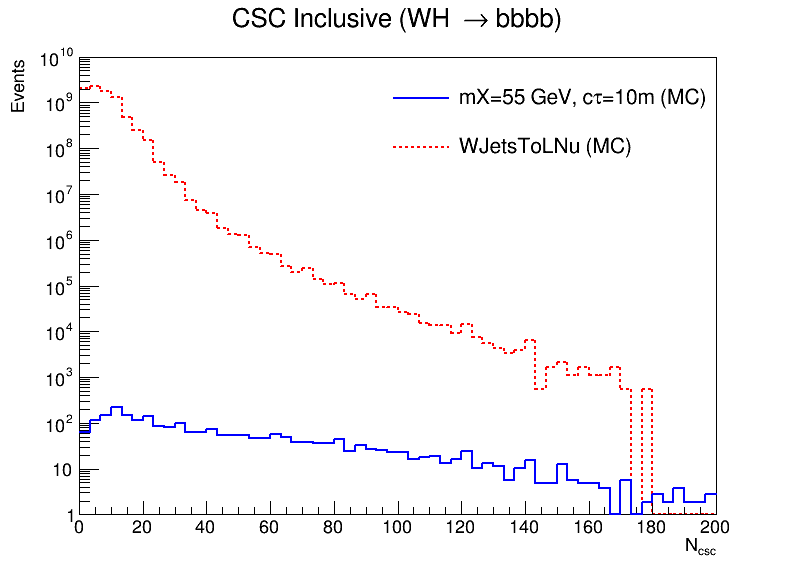

In [37]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)
# h['nCsc_m50ct10m'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(2)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c.SetLogy()

# h['nCsc_m50ct1m'].Scale(1.0/h['nCsc_m50ct1m'].Integral())
# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


# h['nCsc_m50ct1m'].SetLineWidth(1)
h['m55ct10m_wh_bbbb'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
# h['nCsc_zeroBias'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## *N<sub>CSC</sub> Histogram with ME 1/1 and 1/2 Hits Removed*

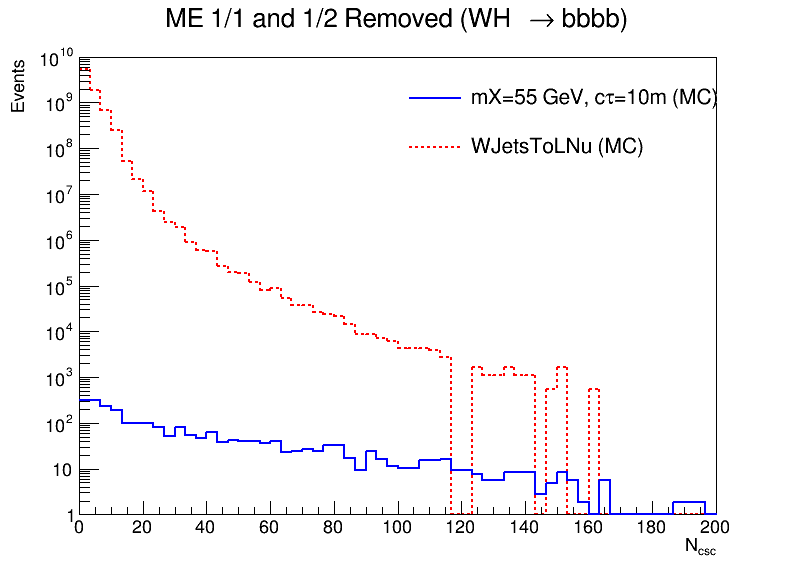

In [38]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c2 = rt.TCanvas('c2','c2', 800, 600)

h['m55ct10m_wh_bbbb_noME112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_noME112', 'Events'], name='m55ct10m_wh_bbbb_noME112', binning=[150,0,500], weights=weight_m55ct10m)
h['m55ct10m_wh_bbbb_noME112'].SetLineColor(4)

h['nCsc_wjets_noME112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_noME112', 'Events'], name='nCsc_wjets_noME112', binning=[150,0,500], weights=weight_WJetsToLNu)
h['nCsc_wjets_noME112'].SetLineColor(2)
h['nCsc_wjets_noME112'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c2.SetLogy()

# h['m55ct10m_wh_bbbb_noME11'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11'].Integral())
# h['nCsc_wjets_noME11'].Scale(1.0/h['nCsc_wjets_noME11'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME112'].SetLineWidth(2)
h['nCsc_wjets_noME112'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['m55ct10m_wh_bbbb_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME112'].GetYaxis().SetRangeUser(1, 10**10)

# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME112'].SetStats(0)
h['nCsc_wjets_noME112'].SetTitle("ME 1/1 and 1/2 Removed (WH #rightarrow bbbb)")
h['nCsc_wjets_noME112'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME112'].Draw('histo')
# h['m55ct10m_wh_bbbb_noME11'].Draw('histo')
h['m55ct10m_wh_bbbb_noME112'].Draw('histo+same')

# h['nCsc_wjets_noME11'].Draw('histo+same')

# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME112'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME112'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c2.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

## *MET p<sub>T</sub> Distribution*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu (Potential memory leak).


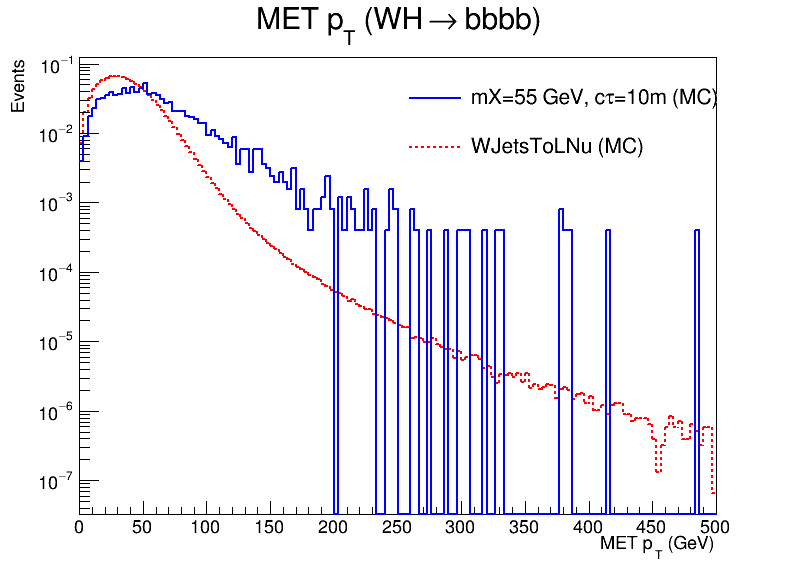

In [99]:
c_met = rt.TCanvas('c_met','c_met', 800, 600)

h['MET_m55ct10m_wh_bbbb'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'], axis_title=['MET_m55ct10m_wh_bbbb', 'Events'], name='MET_m55ct10m_wh_bbbb', binning=[150,0,500])#, weights=weight_m55ct10m)
h['MET_m55ct10m_wh_bbbb'].SetLineColor(4)

h['MET_WJetsToLNu'] = create_TH1D(met_pt['WJetsToLNu'], axis_title=['MET_WJetsToLNu', 'Events'], name='MET_WJetsToLNu', binning=[150,0,500])#, weights=weight_WJetsToLNu)
h['MET_WJetsToLNu'].SetLineColor(2)
h['MET_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met.SetLogy()

h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['MET_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['MET_WJetsToLNu'].SetStats(0)
h['MET_WJetsToLNu'].SetTitle("MET p_{T} (WH #rightarrow bbbb)")
h['MET_WJetsToLNu'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu'].Draw('histo')
h['MET_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_nmu
Warning in <TROOT::Append>: Replacing existing TH1: nMu_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nMu_WJetsToLNu (Potential memory leak).


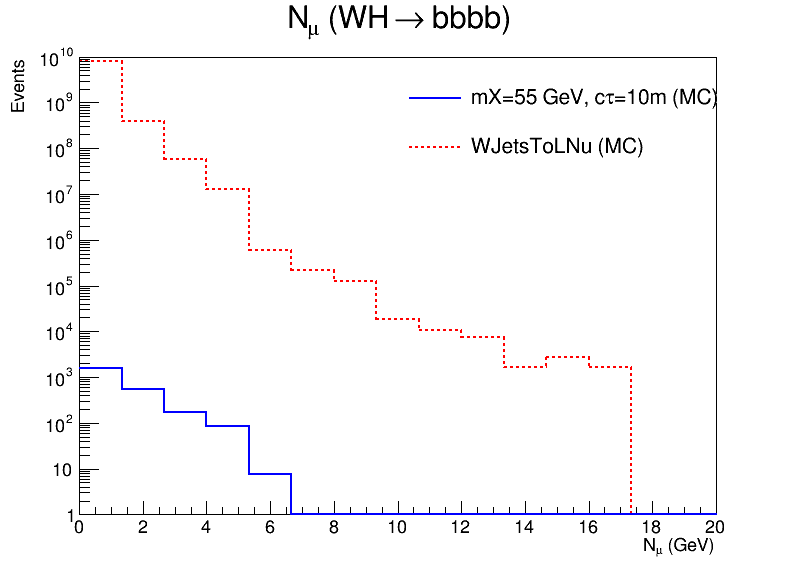

In [64]:
c_nmu = rt.TCanvas('c_nmu','c_nmu', 800, 600)

h['nMu_m55ct10m_wh_bbbb'] = create_TH1D(nMuons['m55ct10m_wh_bbbb'], axis_title=['nMu_m55ct10m_wh_bbbb', 'Events'], name='nMu_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
h['nMu_m55ct10m_wh_bbbb'].SetLineColor(4)

h['nMu_WJetsToLNu'] = create_TH1D(nMuons['WJetsToLNu'], axis_title=['nMu_WJetsToLNu', 'Events'], name='nMu_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
h['nMu_WJetsToLNu'].SetLineColor(2)
h['nMu_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_nmu.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nMu_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['nMu_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['nMu_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['nMu_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
h['nMu_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['nMu_WJetsToLNu'].SetStats(0)
h['nMu_WJetsToLNu'].SetTitle("N_{#mu} (WH #rightarrow bbbb)")
h['nMu_WJetsToLNu'].SetXTitle("N_{#mu} (GeV)")


h['nMu_WJetsToLNu'].Draw('histo')
h['nMu_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nMu_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nMu_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_nmu.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_njets
Warning in <TROOT::Append>: Replacing existing TH1: nJets_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nJets_WJetsToLNu (Potential memory leak).


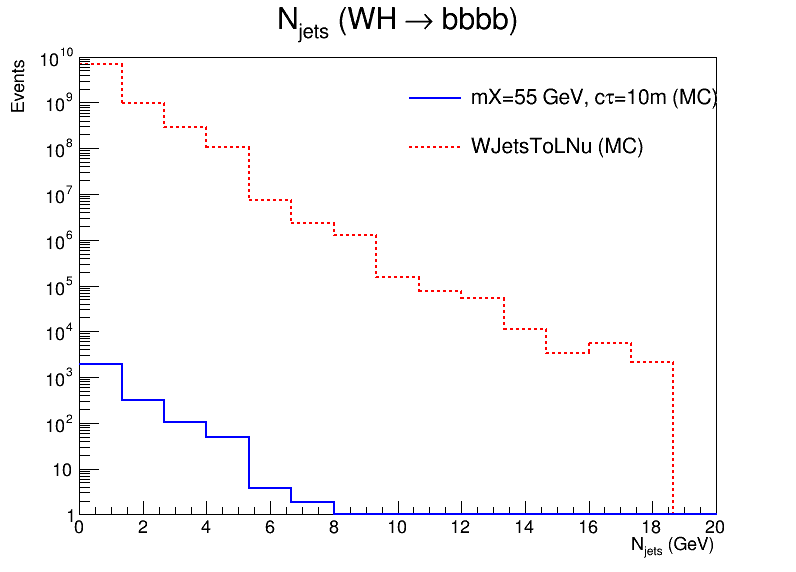

In [66]:
c_njets = rt.TCanvas('c_njets','c_njets', 800, 600)

h['nJets_m55ct10m_wh_bbbb'] = create_TH1D(nJets['m55ct10m_wh_bbbb'], axis_title=['nJets_m55ct10m_wh_bbbb', 'Events'], name='nJets_m55ct10m_wh_bbbb', binning=[15,0,20], weights=weight_m55ct10m)
h['nJets_m55ct10m_wh_bbbb'].SetLineColor(4)

h['nJets_WJetsToLNu'] = create_TH1D(nJets['WJetsToLNu'], axis_title=['nJets_WJetsToLNu', 'Events'], name='nJets_WJetsToLNu', binning=[15,0,20], weights=weight_WJetsToLNu)
h['nJets_WJetsToLNu'].SetLineColor(2)
h['nJets_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_njets.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nJets_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['nJets_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['nJets_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['nJets_WJetsToLNu'].GetXaxis().SetRangeUser(0,20)
h['nJets_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['nJets_WJetsToLNu'].SetStats(0)
h['nJets_WJetsToLNu'].SetTitle("N_{jets} (WH #rightarrow bbbb)")
h['nJets_WJetsToLNu'].SetXTitle("N_{jets} (GeV)")


h['nJets_WJetsToLNu'].Draw('histo')
h['nJets_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nJets_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nJets_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_njets.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_jetpt
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_pt_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_pt_WJetsToLNu (Potential memory leak).


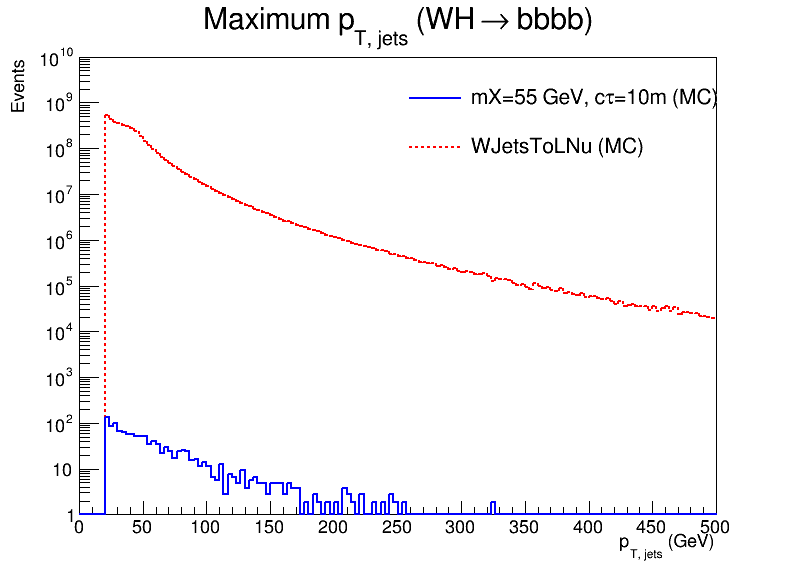

In [90]:
c_jetpt = rt.TCanvas('c_jetpt','c_jetpt', 800, 600)

h['max_jet_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_jet_pt['m55ct10m_wh_bbbb'], axis_title=['max_jet_pt_m55ct10m_wh_bbbb', 'Events'], name='max_jet_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

h['max_jet_pt_WJetsToLNu'] = create_TH1D(max_jet_pt['WJetsToLNu'], axis_title=['max_jet_pt_WJetsToLNu', 'Events'], name='max_jet_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['max_jet_pt_WJetsToLNu'].SetLineColor(2)
h['max_jet_pt_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_jetpt.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['max_jet_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['max_jet_pt_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['max_jet_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['max_jet_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['max_jet_pt_WJetsToLNu'].SetStats(0)
h['max_jet_pt_WJetsToLNu'].SetTitle("Maximum p_{T, jets} (WH #rightarrow bbbb)")
h['max_jet_pt_WJetsToLNu'].SetXTitle("p_{T, jets} (GeV)")


h['max_jet_pt_WJetsToLNu'].Draw('histo')
h['max_jet_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['max_jet_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['max_jet_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_jetpt.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_muonpt
Warning in <TROOT::Append>: Replacing existing TH1: max_muon_pt_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_muon_pt_WJetsToLNu (Potential memory leak).


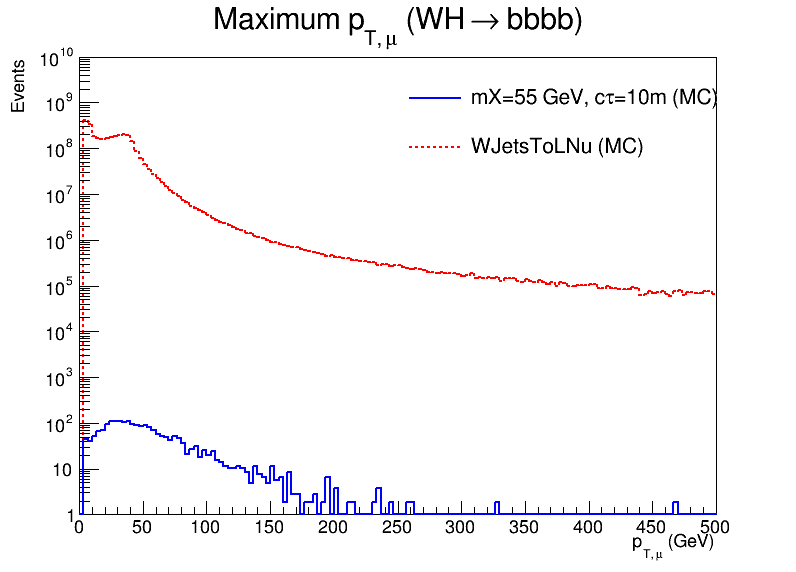

In [95]:
c_muonpt = rt.TCanvas('c_muonpt','c_muonpt', 800, 600)

h['max_muon_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_mu_pt['m55ct10m_wh_bbbb'], axis_title=['max_muon_pt_m55ct10m_wh_bbbb', 'Events'], name='max_muon_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

h['max_muon_pt_WJetsToLNu'] = create_TH1D(max_mu_pt['WJetsToLNu'], axis_title=['max_muon_pt_WJetsToLNu', 'Events'], name='max_muon_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['max_muon_pt_WJetsToLNu'].SetLineColor(2)
h['max_muon_pt_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_muonpt.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['max_muon_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['max_muon_pt_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['max_muon_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['max_muon_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['max_muon_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['max_muon_pt_WJetsToLNu'].SetStats(0)
h['max_muon_pt_WJetsToLNu'].SetTitle("Maximum p_{T, #mu} (WH #rightarrow bbbb)")
h['max_muon_pt_WJetsToLNu'].SetXTitle("p_{T, #mu} (GeV)")


h['max_muon_pt_WJetsToLNu'].Draw('histo')
h['max_muon_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['max_muon_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['max_muon_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_muonpt.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_elept
Warning in <TROOT::Append>: Replacing existing TH1: max_ele_pt_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_ele_pt_WJetsToLNu (Potential memory leak).


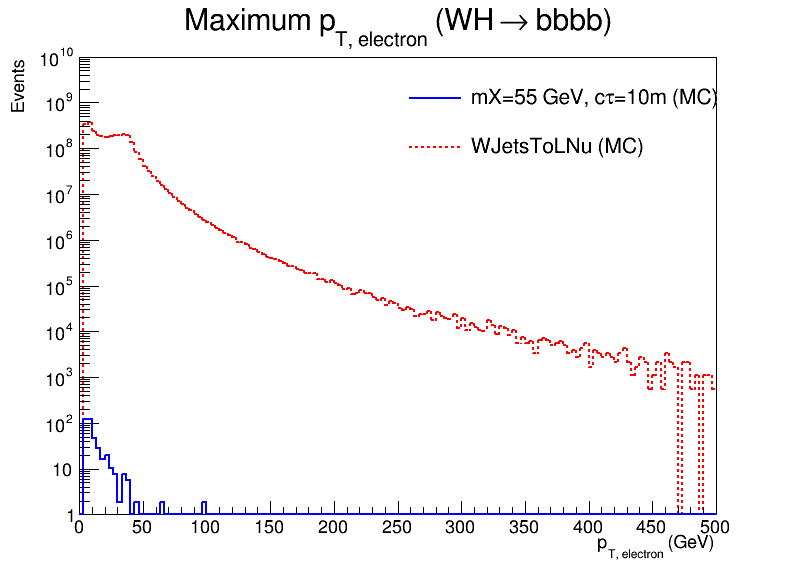

In [97]:
c_elept = rt.TCanvas('c_elept','c_elept', 800, 600)

h['max_ele_pt_m55ct10m_wh_bbbb'] = create_TH1D(max_ele_pt['m55ct10m_wh_bbbb'], axis_title=['max_ele_pt_m55ct10m_wh_bbbb', 'Events'], name='max_ele_pt_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineColor(4)

h['max_ele_pt_WJetsToLNu'] = create_TH1D(max_ele_pt['WJetsToLNu'], axis_title=['max_ele_pt_WJetsToLNu', 'Events'], name='max_ele_pt_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['max_ele_pt_WJetsToLNu'].SetLineColor(2)
h['max_ele_pt_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_elept.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['max_ele_pt_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['max_ele_pt_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['max_ele_pt_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['max_ele_pt_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['max_ele_pt_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['max_ele_pt_WJetsToLNu'].SetStats(0)
h['max_ele_pt_WJetsToLNu'].SetTitle("Maximum p_{T, electron} (WH #rightarrow bbbb)")
h['max_ele_pt_WJetsToLNu'].SetXTitle("p_{T, electron} (GeV)")


h['max_ele_pt_WJetsToLNu'].Draw('histo')
h['max_ele_pt_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['max_ele_pt_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['max_ele_pt_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_elept.Draw()

# k-means Clustering

In [154]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

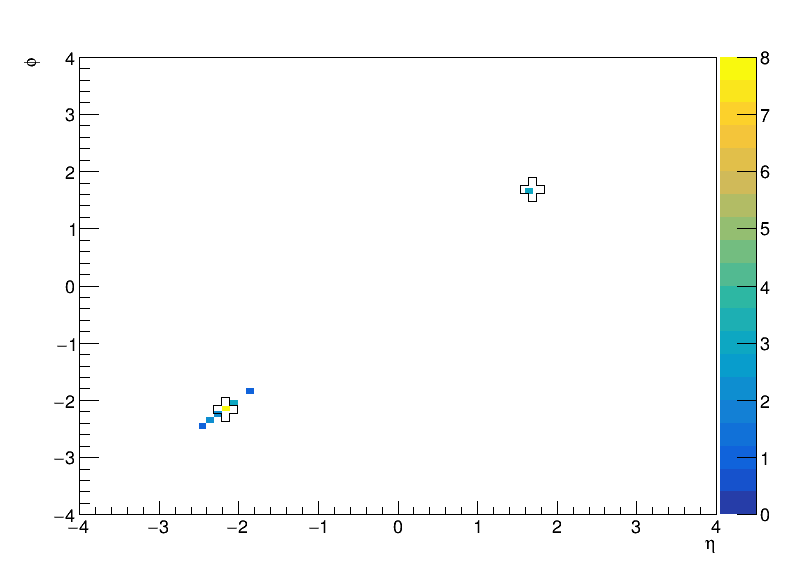

In [155]:
evt_idx = 25

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

In [156]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}

# met_pt_cluster = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
#         centroids, centroid_constituents = kmedians(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
#         met_val = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
#                 met_val += 
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [157]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
        # 310000
        if sel_event > 40000:
            break
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-06 16:35:47.836199-07:00
0: 2019-08-06 16:35:47.849010-07:00
m15ct10m_wh_bbbb: 2019-08-06 16:35:59.202449-07:00
0: 2019-08-06 16:35:59.212719-07:00
1000: 2019-08-06 16:36:11.222495-07:00
2000: 2019-08-06 16:36:23.052404-07:00
m40ct10m_wh_bbbb: 2019-08-06 16:36:24.772295-07:00
0: 2019-08-06 16:36:24.788838-07:00
1000: 2019-08-06 16:36:36.388965-07:00
2000: 2019-08-06 16:36:48.044491-07:00
m55ct10m_wh_bbbb_minus: 2019-08-06 16:36:54.939037-07:00
0: 2019-08-06 16:36:54.952630-07:00
1000: 2019-08-06 16:37:06.701676-07:00
2000: 2019-08-06 16:37:18.306216-07:00
m55ct10m_wh_bbbb_plus: 2019-08-06 16:37:23.115796-07:00
0: 2019-08-06 16:37:23.124796-07:00
1000: 2019-08-06 16:37:32.793084-07:00
2000: 2019-08-06 16:37:42.541442-07:00
3000: 2019-08-06 16:37:52.302942-07:00
4000: 2019-08-06 16:38:01.987865-07:00
5000: 2019-08-06 16:38:11.737757-07:00
6000: 2019-08-06 16:38:21.411955-07:00
7000: 2019-08-06 16:38:31.154646-07:00
8000: 2019-08-06 16:38:40.868557-07:00
9000: 2019-08-06 16

In [162]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [193]:
n_c_total['m55ct10m_wh_bbbb'] = {}
nCsc_cluster['m55ct10m_wh_bbbb'] = {}
for llave in n_c_total['m55ct10m_wh_bbbb_minus'].keys():
    n_c_total['m55ct10m_wh_bbbb'][llave] = np.concatenate([n_c_total['m55ct10m_wh_bbbb_minus'][llave], n_c_total['m55ct10m_wh_bbbb_plus'][llave]])
for cle in nCsc_cluster['m55ct10m_wh_bbbb_minus'].keys():
#     nCsc_cluster['m55ct10m_wh_bbbb'][cle] = {}
#     for kagi in nCsc_cluster['m55ct10m_wh_bbbb'][cle].keys():
    
    nCsc_cluster['m55ct10m_wh_bbbb'][cle] = np.concatenate([nCsc_cluster['m55ct10m_wh_bbbb_minus'][cle], nCsc_cluster['m55ct10m_wh_bbbb_plus'][cle]])

In [196]:
weight_m55ct10m_minus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_minus']['total'])
print(weight_m55ct10m_minus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']))
weight_m55ct10m_minus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_minus']['total']), weight_m55ct10m_minus_cluster)

weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
print(weight_m55ct10m_plus_cluster)
print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu_cluster = (61526.7 * 137 * 1000)/len(n_c_total['WJetsToLNu']['total'])
print(weight_WJetsToLNu_cluster)
print(len(n_c_total['WJetsToLNu']['total']))
weight_WJetsToLNu_cluster = np.full(len(n_c_total['WJetsToLNu']['total']), weight_WJetsToLNu_cluster)

9.117165150346954
2594
9.821398006644518
2408
210718.41157942102
40002


In [194]:
print(nCsc_cluster['m55ct10m_wh_bbbb_minus'])

{'csc_inclusive': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME11': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME112': array([71., 40.,  7., ..., 49.,  4.,  0.]), 'csc_noME1123': array([71., 40.,  7., ..., 49.,  4.,  0.])}


In [163]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_inclusive']))
        eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME11']))
        eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME112']))
        eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    
    # Clustering
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
    rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
    rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
    rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

## *N<sub>CSC</sub> Threshold ROC Curves*

In [176]:
print(eff_ncsc['m55ct10m_wh_bbbb_plus']['cluster'])

{'csc_inclusive': array([0.79111296, 0.79111296, 0.79111296, 0.79111296, 0.72799003,
       0.69684385, 0.67400332, 0.65988372, 0.64576412, 0.625     ,
       0.60423588, 0.58887043, 0.57807309, 0.56270764, 0.55440199,
       0.5423588 , 0.53280731, 0.52408638, 0.51162791, 0.49626246,
       0.47965116, 0.46719269, 0.45805648, 0.44892027, 0.44061462,
       0.4339701 , 0.4269103 , 0.42151163, 0.4127907 , 0.40199336,
       0.39327243, 0.38538206, 0.37832226, 0.37167774, 0.36461794,
       0.35963455, 0.35174419, 0.34468439, 0.33596346, 0.32931894,
       0.32059801, 0.31519934, 0.30813953, 0.3019103 , 0.29817276,
       0.29360465, 0.28862126, 0.285299  , 0.2807309 , 0.27533223,
       0.2711794 , 0.26536545, 0.25996678, 0.25415282, 0.24750831,
       0.24086379, 0.23131229, 0.22549834, 0.21885382, 0.21428571,
       0.20971761, 0.2051495 , 0.1980897 , 0.19601329, 0.1910299 ,
       0.18563123, 0.18272425, 0.17649502, 0.17275748, 0.1673588 ,
       0.16362126, 0.16112957, 0.15614618, 0

In [181]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
# print(eff_ncsc['m55ct10m_wh_bbbb_minus'].keys())
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
#         print(cle)
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


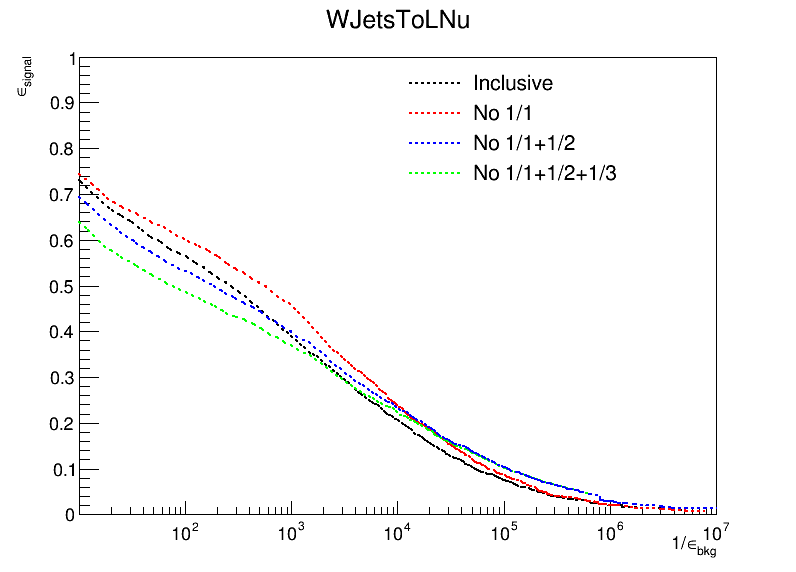

In [182]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10000000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');


legend.Draw();

c3.Draw()

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


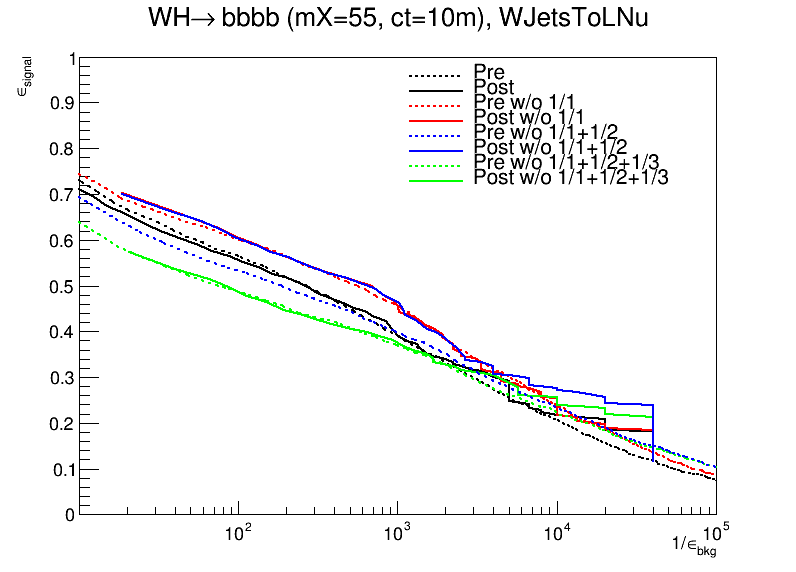

In [183]:
c4 = rt.TCanvas('c4','c4', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_clean_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_res_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_med_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c4.SetLogx()
# c3.SetLogy()

h['roc_curve_noCluster'].SetTitle('WH#rightarrow bbbb (mX=55, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_clean_cluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)

h['roc_curve_res_cluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)

h['roc_curve_med_cluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_cluster'].SetLineStyle(1)
h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_cluster'].SetLineColor(2)
h['roc_curve_clean_cluster'].SetLineStyle(1)
h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_cluster'].SetLineColor(3)
h['roc_curve_res_cluster'].SetLineStyle(1)
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_cluster'].SetLineColor(4)
h['roc_curve_med_cluster'].SetLineStyle(1)
h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 100000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)



h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_clean_cluster'].Draw('same')
h['roc_curve_clean_noCluster'].Draw('same')
h['roc_curve_res_cluster'].Draw('same')
h['roc_curve_med_cluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "Pre w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_clean_cluster'], "Post w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "Pre w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_med_cluster'], "Post w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "Pre w/o 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_res_cluster'], "Post w/o 1/1+1/2+1/3", 'l');


legend.Draw();

c4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb_noME11_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME11_cluster (Potential memory leak).


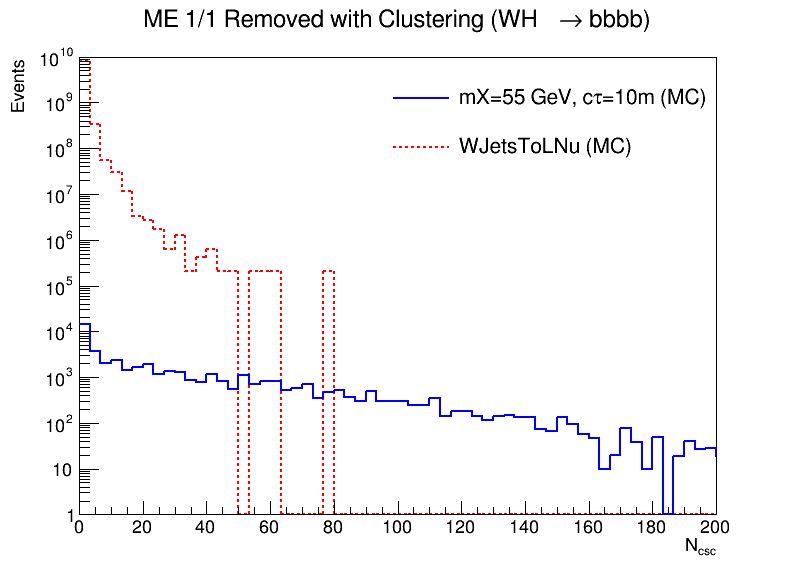

In [198]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c5 = rt.TCanvas('c5','c5', 800, 600)

h['m55ct10m_wh_bbbb_noME11_cluster'] = create_TH1D(nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME11'], axis_title=['m55ct10m_wh_bbbb_noME11_cluster', 'Events'], name='m55ct10m_wh_bbbb_noME11_cluster', binning=[150,0,500], weights = weight_m55ct10m_cluster)
h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineColor(4)

h['nCsc_wjets_noME11_cluster'] = create_TH1D(nCsc_cluster['WJetsToLNu']['csc_noME11'], axis_title=['nCsc_wjets_noME11_cluster', 'Events'], name='nCsc_wjets_noME11_cluster', binning=[150,0,500], weights = weight_WJetsToLNu_cluster)
h['nCsc_wjets_noME11_cluster'].SetLineColor(2)
h['nCsc_wjets_noME11_cluster'].SetLineStyle(2)

c5.SetLogy()

# h['m55ct10m_wh_bbbb_noME11_cluster'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11_cluster'].Integral())
# h['nCsc_wjets_noME11_cluster'].Scale(1.0/h['nCsc_wjets_noME11_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineWidth(2)
h['nCsc_wjets_noME11_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['nCsc_wjets_noME11_cluster'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11_cluster'].SetStats(0)
h['nCsc_wjets_noME11_cluster'].SetTitle("ME 1/1 Removed with Clustering (WH #rightarrow bbbb)")
h['nCsc_wjets_noME11_cluster'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11_cluster'].Draw('histo')
h['m55ct10m_wh_bbbb_noME11_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME11_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c5.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

In [227]:
sel_cluster = {}
for data_type in data_trees.keys():
    sel_cluster[data_type] = np.array(n_c_total[data_type]['total'], dtype=bool)
sel_cluster['m55ct10m_wh_bbbb'] = np.array(n_c_total['m55ct10m_wh_bbbb']['total'], dtype=bool)
print(len(nCsc['m40ct10m_wh_bbbb']))
print(len(n_c_total['m40ct10m_wh_bbbb']['total']))
print(sel_cluster['m55ct10m_wh_bbbb'])
# print(sel_cluster['WJetsToLNu'].astype(int))
print(type(n_c_total['WJetsToLNu']['total']))
print(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])

2146
2146
[ True  True  True ... False  True  True]
<class 'list'>
[4. 6. 4. ... 4. 6. 4.]


In [228]:
weight_m55ct10m_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']])
print(weight_m55ct10m_clusternonZero)
print(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]))
weight_m55ct10m_clusternonZero = np.full(len(n_c_total['m55ct10m_wh_bbbb']['total'][sel_cluster['m55ct10m_wh_bbbb']]), weight_m55ct10m_clusternonZero)

# weight_m55ct10m_plus_cluster = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(n_c_total['m55ct10m_wh_bbbb_plus']['total'])
# print(weight_m55ct10m_plus_cluster)
# print(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']))
# weight_m55ct10m_plus_cluster = np.full(len(n_c_total['m55ct10m_wh_bbbb_plus']['total']), weight_m55ct10m_plus_cluster)

# weight_m55ct10m_cluster = np.concatenate([weight_m55ct10m_minus_cluster, weight_m55ct10m_plus_cluster])

# # weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# # weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# # weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# # weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)
# print(sel_cluster['m55ct10m_wh_bbbb'])
# print(len(n_c_total['WJetsToLNu']['total']))

weight_WJetsToLNu_clusternonZero = (5.328 * 10**-1 * 0.324 * 137 * 1000)/len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']])
print(weight_WJetsToLNu_clusternonZero)
print(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]))
weight_WJetsToLNu_clusternonZero = np.full(len(np.array(n_c_total['WJetsToLNu']['total'])[sel_cluster['WJetsToLNu']]), weight_WJetsToLNu_clusternonZero)

5.928785760842317
3989
2.21877534477906
10659


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met_cluster
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu_cluster (Potential memory leak).


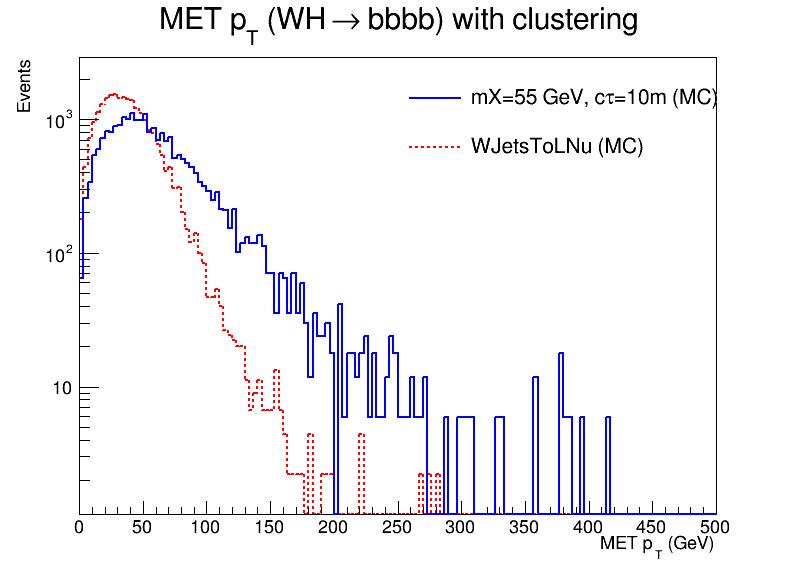

In [234]:
c_met_cluster = rt.TCanvas('c_met_cluster','c_met_cluster', 800, 600)

h['MET_m55ct10m_wh_bbbb_cluster'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'][sel_cluster['m55ct10m_wh_bbbb']], axis_title=['MET_m55ct10m_wh_bbbb_cluster', 'Events'], name='MET_m55ct10m_wh_bbbb_cluster', binning=[150,0,500], weights=weight_m55ct10m_clusternonZero)
h['MET_m55ct10m_wh_bbbb_cluster'].SetLineColor(4)

h['MET_WJetsToLNu_cluster'] = create_TH1D(met_pt['WJetsToLNu'][:len(sel_cluster['WJetsToLNu'])][sel_cluster['WJetsToLNu']], axis_title=['MET_WJetsToLNu_cluster', 'Events'], name='MET_WJetsToLNu_cluster', binning=[150,0,500], weights = weight_WJetsToLNu_clusternonZero)
h['MET_WJetsToLNu_cluster'].SetLineColor(2)
h['MET_WJetsToLNu_cluster'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met_cluster.SetLogy()

# h['MET_m55ct10m_wh_bbbb_cluster'].Scale(1.0/h['MET_m55ct10m_wh_bbbb_cluster'].Integral())
# h['MET_WJetsToLNu_cluster'].Scale(1.0/h['MET_WJetsToLNu_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)
h['MET_WJetsToLNu_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_WJetsToLNu_cluster'].GetXaxis().SetRangeUser(0,500)
# h['MET_WJetsToLNu_cluster'].GetYaxis().SetRangeUser(1,10**10)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['MET_WJetsToLNu_cluster'].SetStats(0)
h['MET_WJetsToLNu_cluster'].SetTitle("MET p_{T} (WH #rightarrow bbbb) with clustering")
h['MET_WJetsToLNu_cluster'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu_cluster'].Draw('histo')
h['MET_m55ct10m_wh_bbbb_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met_cluster.Draw()